# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.


План:
1.  Ознакомление с данными:
- Смотрим общую информацию;
- Смотрим пропуски;
- Предложения по обработке пропусков.
2. Предобработка данных:
- Работа с пропусками;
- Итог работы по заполнению пропусков;
- Изменение типа данных;
- Добавление новых столбцов.
3. Анализ данных.
4. Общий вывод. 


### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from datetime import datetime 
from IPython.display import display
 

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# Изучим общую информацию о датафрейме
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

В описании данных is_apartment имеет булевый тип, ponds_nearest, ponds_around3000, parks_nearest, parks_around3000, balcony, floors_total,days_exposition имеют  тип вещественные числа. Принимаем это для сведения.

In [4]:
#Посмотрим пропуски
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Очень много NaN в таблице. 

- ceiling_height - возможно предположить,  что не все продавцы владеют информацией о высоте потолков в квартире, по этой причине пропускают данный показатель.Предположим, что  можно использовать средний показатель. -
- is_apartment - предположительно имеет пропуски по причине, что владелец не заполнял данные, так как его объект не относится к апартаментам. 
- balcony - предположительно владельцы квартир не указывали "0" при отсутствии балкона. Предположительно можно пропуски заменить на число 0.
- airports_nearest, cityCenters_nearest, parks_around3000,parks_nearest, ponds_nearest - предположиетельно данные не до конца были выгружены программой навигации или навигация была отключена при внесении данных, установлен определенный радиус внесения данных. Предположительно можно заменить на "0" чтобы показать наличие пропусков заказчику или оставить без изменений.
- first_day_exposition, days_exposition - имеет данные о продаже с 2015 года, причиной может быть отсутствие данных в системе о проведении сделки или квартира имеет  обременение, которе существенно снижает вероятность продажи. Среднее значение и медиану не можем применить, пропусков не много, поэтому можем оставить данные в таком виде, зменив тип данных.


In [5]:
#Посмотрим общую информацию
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Есть квартиры площадью 900 кв.м., 19 комнатами, высотой потолка 100 м., на 60 этаже. Проверим данные на предмет аномальных значений.

In [6]:
# Проверим количество явных дубликатов
data.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

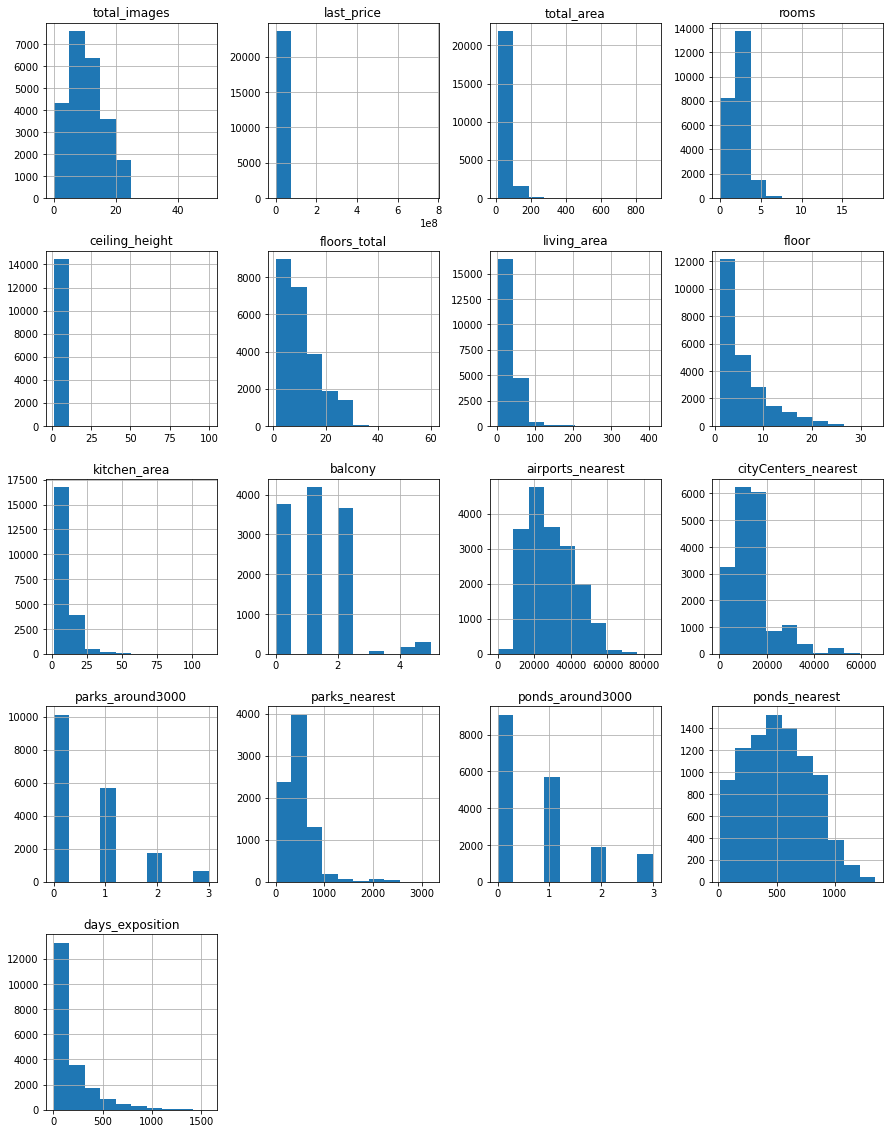

In [7]:
# Построим  гистограмму для всех числовых столбцов таблицы на одном графике
data.hist(figsize=(15, 20))

**Вывод первого этапа**

В столбцах floors_total, balcony, parks_around3000, ponds_around3000 и days_exposition тип данных должны быть целочисленными (int, а не float), is_apartment - должен быть булевым (bool, а не object), а first_day_exposition должен быть  тип даты и времени, а не вещественным.

Переименуем столбец cityCenters_nearest в соответствии со стилем snake_case.

Явных дубликатов нет.

В таблице имеется большое число пропусков, которые могут быть связаны с человеческим факторм, технической ошибкой. Например владелец мог не указать данные по количеству балконов по причине их отсутствия. Технические ошибки могут быть связаны с отсутствием данных в части жилой или нежилой недвижимости, этим может объясняться наличие квартир площадью 900 кв.м., высотой потолков 100 м.

Данные представлены в виде таблицы из 23 698 строк и 22 столбцов, из которых типа bool 2 столбца, типа float 14 столбцов, типа int 3 столбца, типа object 3 столбца.

В данных содержится следующее описание:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты 
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка 
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении 

### Выполните предобработку данных

In [8]:
#Выведем количество пропущенных значений для каждого столбца.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
#Выведем количество пропущенных значений для каждого столбца, отсортированных по убыванию
missing_values = data.isnull().sum().sort_values(ascending=False)
print(missing_values)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64


**is_apartment — апартаменты**

In [10]:
#Анализируем пропуски
display('Количество NaN в столбце is_apartment:', data['is_apartment'].isnull().sum())
data['is_apartment'].value_counts()

'Количество NaN в столбце is_apartment:'

20924

False    2725
True       50
Name: is_apartment, dtype: int64

In [11]:
#Предположим, что владелец не заполнял данные, так как объект не относится к апартаментам
data.is_apartment = data.is_apartment.fillna(False)
#Заменим тип данных на bool
data.is_apartment = data.is_apartment.astype(bool)
#Оставляем в таком виде

**balcony — число балконов**

In [12]:
#Анализируем пропуски: balcony — число балконов
display('Количество NaN в столбце balcony:', data['balcony'].isnull().sum())
data['balcony'].value_counts()

'Количество NaN в столбце balcony:'

11519

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [13]:
#Заменим NaN на "0", предположив, что данные не были проставлены владельцами по причине отсутствия балконов.
data['balcony'] = data['balcony'].fillna(0)
print('Количество NaN в столбце balcony:', data['balcony'].isnull().sum())

Количество NaN в столбце balcony: 0


**ceiling_height - высота потолков (м)**

In [14]:
#Анализируем пропуски и заполним медианным значением в столбце 
display('Медиана в ceiling_height:',data.ceiling_height.median())
data.ceiling_height = data.ceiling_height.fillna(2.65)

'Медиана в ceiling_height:'

2.65

In [15]:
#Выведем столбец ceiling_height для определения данных для замены
data.ceiling_height.sort_values(ascending=False).head(30)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
17857     27.0
5246      27.0
20478     27.0
22938     27.0
5807      27.0
21824     27.0
10773     27.0
5669      26.0
18545     25.0
4643      25.0
9379      25.0
11285     25.0
14382     25.0
355       25.0
6246      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
3474       8.0
15743      8.0
17442      8.0
20264      6.0
Name: ceiling_height, dtype: float64

In [16]:
#Переведем столбец ceiling_height к вещественному значению в ручную.
data.loc[(data.ceiling_height == 32), 'ceiling_height'] = 3.2
data.loc[(data.ceiling_height == 100), 'ceiling_height'] = 10
data.loc[(data.ceiling_height == 20), 'ceiling_height'] = 2.0
data.loc[(data.ceiling_height == 22.6), 'ceiling_height'] = 2.6
data.loc[(data.ceiling_height == 24), 'ceiling_height'] = 2.4
data.loc[(data.ceiling_height == 25), 'ceiling_height'] = 2.5
data.loc[(data.ceiling_height == 26), 'ceiling_height'] = 2.6
data.loc[(data.ceiling_height == 27), 'ceiling_height'] = 2.7
data.loc[(data.ceiling_height == 27.50), 'ceiling_height'] = 2.7

In [17]:
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] /= 10 

In [18]:
#Проверим столбец ceiling_height через проверку основных статистических показателей  после замены
display(data['ceiling_height'].describe())

count    23699.000000
mean         2.698733
std          0.253192
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

Есть одно минимальное и максимальное отклонение, но оно не повлияет на анализ. Оставляем как есть.

**floors_total — всего этажей в доме**

In [19]:
#Заменим NaN на "0", предположив, что данные не были проставлены владельцами по причине отсутствия этажности в доме.
data['floors_total'] = data['floors_total'].fillna(0)
print('Количество NaN в столбце floors_total:', data['floors_total'].isnull().sum())

Количество NaN в столбце floors_total: 0


In [20]:
# Меняем тип на int в столбце floors_total 
data.floors_total = data.floors_total.astype('int')

In [21]:
#Проверяем результат замены типа
data.floors_total.sort_values(ascending=False).head(30)

2253     60
16731    52
16934    37
11079    36
5807     36
397      36
22946    35
20938    35
2966     35
1060     35
15982    35
9370     35
18629    35
18617    35
13975    35
1917     35
8496     35
4855     35
9186     35
5808     35
14347    35
5749     35
18218    35
21599    35
12960    35
21809    35
9579     35
12888    35
871      35
7236     35
Name: floors_total, dtype: int64

**locality_name — название населённого пункта**

In [22]:
# Проанализируем на предмет уникальных значений  столбец locality_name 
display('Количество уникальных значений:', data['locality_name'].nunique())
data['locality_name'].unique()

'Количество уникальных значений:'

364

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [23]:
# Устраним дубликаты и приведём значения к нижнему регистру для избавления от дубликатов
data['locality_name'] = data['locality_name'].str.lower()

In [24]:
# Выполним замену ошибки в написании 'поселок' вместо 'посёлок':
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

In [25]:
# Выполним замену  однотипных значений
data['locality_name'] = data.locality_name.str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data.locality_name.str.replace('городской поселок', 'поселок')

In [26]:
#Выполним проверку произведенной замены
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'посёлок городского типа красный бор', 'гатчина',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'посёлок молодцово',
       'посёлок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'посёлок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'посёлок торковичи', 'посёлок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посёлок новый свет

In [27]:
#Количество NaN в столбце locality_name 49.
#Так как нет дополнительной информации по замене пропущенных значений произведем их удаление.
data = data.dropna(subset=['locality_name']) 
display('Количество NaN:', data.locality_name.isna().sum())

# Kол-во уникальных значений после удаления дубликатов
display("Количество уникальных значений столбца 'locality_name':", data['locality_name'].nunique())

'Количество NaN:'

0

"Количество уникальных значений столбца 'locality_name':"

330

**airports_nearest — расстояние до ближайшего аэропорта в метрах (м)**

In [28]:
#Проанализируем столбец airports_nearest 
print('Количество NaN по airports_nearest:', data['airports_nearest'].isnull().sum())

Количество NaN по airports_nearest: 5534


In [29]:
print(data.airports_nearest.describe())

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64


Количество NaN по airports_nearest: 5534. Такое количество пропусков не заменить ни средней, ни медианной величиной. Так как эти данные получены автоматически на основе навигации, это говорит о том, что аэропорт находится за пределами города. В столбцах parks_around3000, parks_nearest, ponds_around3000,ponds_nearest,cityCenters_nearest ситуация аналогичная. По этой причине предлагаю данные в столбце оставить без изменения или заменить на "0" чтобы были видны пропуски.

In [30]:
#Заменим NaN на "0"
data['airports_nearest'] = data['airports_nearest'].fillna(0)
print('Количество NaN в столбце airports_nearest:', data['airports_nearest'].isnull().sum())

Количество NaN в столбце airports_nearest: 0


**parks_around3000, parks_nearest, ponds_around3000,ponds_nearest,cityCenters_nearest**

In [31]:
#Заменяем пропущенные данные на "0" в столбцах parks_around3000, parks_nearest, ponds_around3000,ponds_nearest,
data['parks_around3000'] = data['parks_around3000'].fillna(0)
print('Количество NaN в столбце parks_around3000:', data['parks_around3000'].isnull().sum())

data['parks_nearest'] = data['parks_nearest'].fillna(0)
print('Количество NaN в столбце parks_nearest:', data['parks_nearest'].isnull().sum())

data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
print('Количество NaN в столбце ponds_around3000:', data['ponds_around3000'].isnull().sum())
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
print('Количество NaN в столбце ponds_nearest:', data['ponds_nearest'].isnull().sum())

data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
print('Количество NaN в столбце cityCenters_nearest:', data['cityCenters_nearest'].isnull().sum())

Количество NaN в столбце parks_around3000: 0
Количество NaN в столбце parks_nearest: 0
Количество NaN в столбце ponds_around3000: 0
Количество NaN в столбце ponds_nearest: 0
Количество NaN в столбце cityCenters_nearest: 0


In [32]:
#После исключения пропусков земеняем в столбцах parks_around3000, parks_nearest, ponds_around3000,ponds_nearest тип данных
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['ponds_nearest'] = data['ponds_nearest'].astype(int)
data['parks_nearest'] = data['parks_nearest'].astype(int)
#Изменение типа данных важно для обеспечения правильной работы с данными

In [33]:
# Приведем  к единому стилю имя столбца cityCenters_nearest - расстояние до центра города (м)
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

In [34]:
# Приведем  к единому стилю имя столбцов parks_around3000, ponds_around3000
data = data.rename(columns={'parks_around3000':'parks_around'})
data = data.rename(columns={'ponds_around3000':'ponds_around'})

**first_day_exposition - дата публикации**

In [35]:
#Поменяем тип данных и формат в столбце first_day_exposition 
data.first_day_exposition = pd.to_datetime(data.first_day_exposition)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#Работа с данными в формате даты и времени более удобна для анализа и обработки, проведения операций, сортировки.
#Столбец days_exposition не меняем, так как он не влияет на анализ, произвести замену типа данных без удаления пропусков не возможно.

**kitchen_area  — площадь кухни в квадратных метрах (м²)**

In [36]:
#Проанализируем столбец kitchen_area, всего 21421 пропусков
# Проведем фильтрацию строк с условием, что в студиях нет кухни, она объединена с жилой зоной
studio_no_kitchen = data[(data['studio'] == True) & (data['kitchen_area'].isna()) & (data['rooms'] == 1)]
# Установка значения площади кухни равным нулю для отфильтрованных строк
data.loc[studio_no_kitchen.index, 'kitchen_area'] = 0
#Проверим количество оставшихся пропусков в столбце
print('Количество NaN в столбце kitchen_area:', data['kitchen_area'].isnull().sum())

Количество NaN в столбце kitchen_area: 2258


In [37]:
#Для оставшихся 2258 пропусков в столбце median_kitchen_area применим медиану
median_kitchen_area = data['kitchen_area'].median()
# Заполняем пропуски в столбце kitchen_area медианным значением
data['kitchen_area'].fillna(median_kitchen_area, inplace=True)
#Проверим количество оставшихся пропусков в столбце
print('Количество NaN в столбце kitchen_area:', data['kitchen_area'].isnull().sum())

Количество NaN в столбце kitchen_area: 0


**living_area — жилая площадь в квадратных метрах (м²)**

In [38]:
#Проанализируем столбец living_area, 1898 пропусков
#Выведем среднее значение living_area в зависимости от населенного пункта с вычислением среднего значения жилой площади
average_living_area_by_locality = data.groupby('locality_name')['living_area'].mean()
# Выведем среднее значение жилой площади по населенному пункту
print(average_living_area_by_locality)

locality_name
бокситогорск    31.940000
волосово        28.332857
волхов          31.930000
всеволожск      30.846469
выборг          34.400311
                  ...    
сосновый бор    32.129412
сясьстрой       31.369231
тихвин          28.703611
тосно           32.276947
шлиссельбург    30.720000
Name: living_area, Length: 330, dtype: float64


In [39]:
# Заполненим пропущенные значения в столбце living_area средними значением по району
data['living_area'] = data.groupby('locality_name')['living_area'].transform(lambda x: x.fillna(x.mean()))
print('Количество NaN в столбце living_area:', data['living_area'].isnull().sum())

Количество NaN в столбце living_area: 17


Осталось 17 пропусков.Количество не значительное, оставим как есть.

In [40]:
# Пробелы восполнены, типы данных приведенны в порядок
print(data.isna().sum())
data.info()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area               17
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around               0
parks_nearest              0
ponds_around               0
ponds_nearest              0
days_exposition         3180
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   tot

**Вывод второго этапа**

По результату предобработки данных были заполненны пропуски, где это было возможно, и измененны типы данных. В большом числе столбцов имелись пропуски данных, которые не были надлежаще загружены через навигационные программы или отсутствуют по причине человеческого фактора. Необходимо донести данную информацию до заказчика.

### Добавьте в таблицу новые столбцы

In [41]:
#Добавим столбец price_per_square_meter - цена одного квадратного метра 
data['price_per_square_meter'] = data['last_price']/data['total_area']
#Округлим до двух знаков после запятой значение в столбце price_per_square_meter
data['price_per_square_meter'] = data['price_per_square_meter'].round(2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,0.0,санкт-петербург,18863.0,16028.0,1,482,2,755,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,2.0,посёлок шушары,12817.0,18603.0,0,0,0,0,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,0.0,санкт-петербург,21741.0,13933.0,1,90,2,574,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,36.959148,9,False,...,0.0,санкт-петербург,28098.0,6800.0,2,84,3,234,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,0.0,санкт-петербург,31856.0,8098.0,2,112,1,48,121.0,100000.00


In [42]:
#Добавим столбец weekday_exposition -день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday  
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,санкт-петербург,18863.0,16028.0,1,482,2,755,NaN,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,посёлок шушары,12817.0,18603.0,0,0,0,0,81.0,82920.79,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,санкт-петербург,21741.0,13933.0,1,90,2,574,558.0,92785.71,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,36.959148,9,False,...,санкт-петербург,28098.0,6800.0,2,84,3,234,424.0,408176.10,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,санкт-петербург,31856.0,8098.0,2,112,1,48,121.0,100000.00,1


In [43]:
#Добавим столбец month_exposition - месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,18863.0,16028.0,1,482,2,755,NaN,120370.37,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,12817.0,18603.0,0,0,0,0,81.0,82920.79,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,21741.0,13933.0,1,90,2,574,558.0,92785.71,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,36.959148,9,False,...,28098.0,6800.0,2,84,3,234,424.0,408176.10,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,31856.0,8098.0,2,112,1,48,121.0,100000.00,1,6


In [44]:
#Добавим столбец year_exposition - год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,16028.0,1,482,2,755,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,18603.0,0,0,0,0,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,13933.0,1,90,2,574,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,36.959148,9,False,...,6800.0,2,84,3,234,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,8098.0,2,112,1,48,121.0,100000.00,1,6,2018


In [45]:
#Добавим столбец floor_type - тип этажа квартиры (значения — «первый», «последний», «другой»)
conditions = [
    (data['floor'] == 1),
    (data['floor'] == data['floors_total']),
    (data['floor'] != 1) & (data['floor'] != data['floors_total'])
]

values = ['первый', 'последний', 'другой']
data['floor_type'] = np.select(conditions, values, default=None) 

In [46]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,1,482,2,755,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0,0,0,0,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,1,90,2,574,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,36.959148,9,False,...,2,84,3,234,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,2,112,1,48,121.0,100000.00,1,6,2018,другой


In [47]:
#Добавим столбец расстояние до центра города в километрах, переведем из м в км и округлим до ближайших целых значений.
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round().astype(int)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482,2,755,NaN,120370.37,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0,0,0,81.0,82920.79,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,90,2,574,558.0,92785.71,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,36.959148,9,False,...,84,3,234,424.0,408176.10,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112,1,48,121.0,100000.00,1,6,2018,другой,8


In [48]:
#Округляем до 1 знака после запятой  ceiling_height, living_area, kitchen_area
to_float_1 = ['ceiling_height', 'living_area', 'kitchen_area']
for column in to_float_1:
    data[column] = data[data[column].notnull()][column].round(1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,482,2,755,NaN,120370.37,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.6,11,18.6,1,False,...,0,0,0,81.0,82920.79,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.6,5,34.3,4,False,...,90,2,574,558.0,92785.71,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,2.6,14,37.0,9,False,...,84,3,234,424.0,408176.10,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,112,1,48,121.0,100000.00,1,6,2018,другой,8


**Вывод третьего этапа**

В таблицу были добавлены дополнительные столбцы с параметрами расстояния до центра города в километрах, типом этажа квартиры, годом, месяцем, днем недели публикации объявления, цены одного квадратного метра. Округлены значения.

### Проведите исследовательский анализ данных

4.1.Изучим параметры объектов и построим отдельные гистограммы для каждого из этих параметров:
общая площадь, жилая площадь,площадь кухни,цена объекта,количество комнат,высота потолков,тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего парка.

**total_area - общей площади квартиры в квадратных метрах (м²)**

In [49]:
#Изучим параметр total_area 
print(data.total_area.describe())

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


Диаграмма размаха


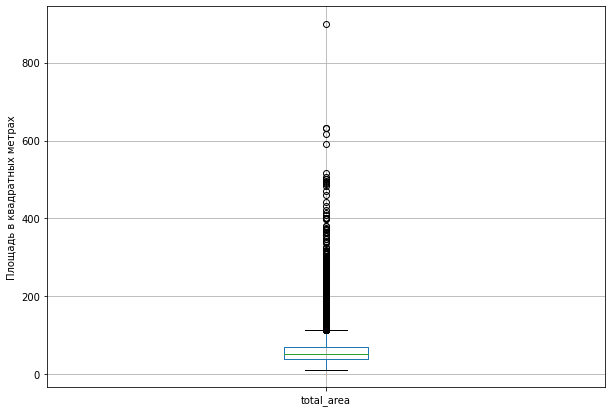

In [50]:
#Построим диаграмму размаха
print('Диаграмма размаха')
data.boxplot(column=['total_area'], figsize=(10,7), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

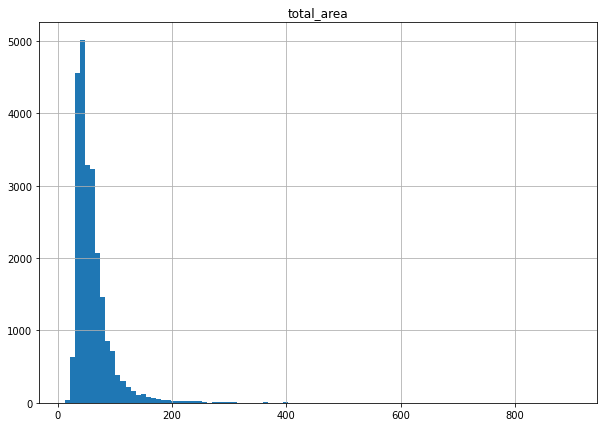

In [51]:
data.hist('total_area', bins=100, figsize=(10,7));

Диаграмма размаха площади после исключения выбивающихся значений


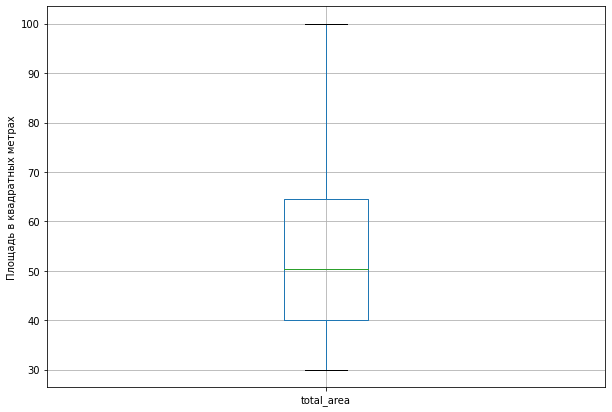

In [52]:
#Исключаем даные до 30 и более 100
df = data.query('total_area >= 30 & total_area <= 100')
print('Диаграмма размаха площади после исключения выбивающихся значений')
df.boxplot(column=['total_area'], figsize=(10,7), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

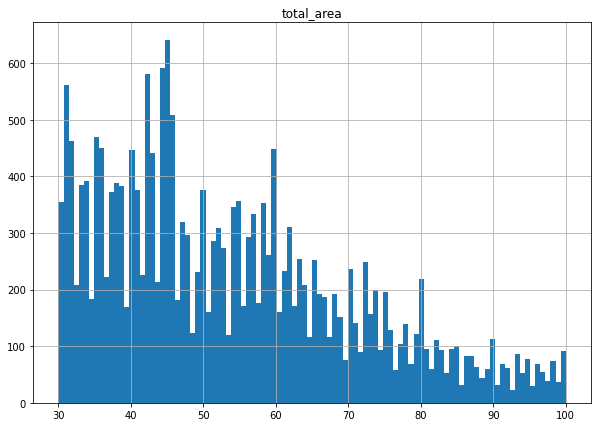

In [53]:
#Проверим на гистограмме результат
df.hist('total_area', bins=100, figsize=(10,7))

Большое количество квартир от 30 кв.м. до 80 кв.м., пик приходится на  50 кв.м.

**living_area — жилая площадь в квадратных метрах (м²)**

In [54]:
#Изучим параметр living_area 
print(data.living_area.describe())

count    23633.000000
mean        34.411247
std         21.201245
min          2.000000
25%         19.000000
50%         30.800000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64


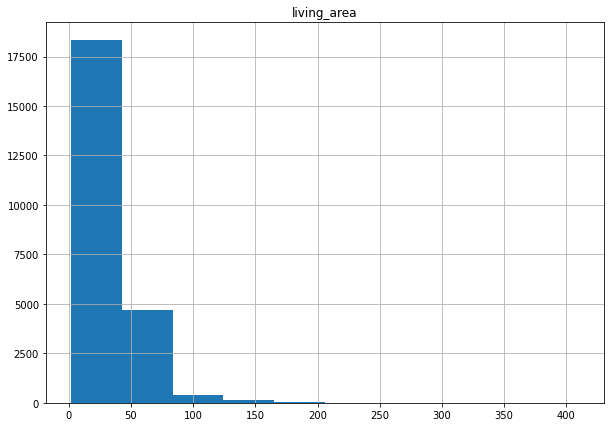

In [55]:
data.hist('living_area', bins=10, figsize=(10,7));

Диаграмма размаха


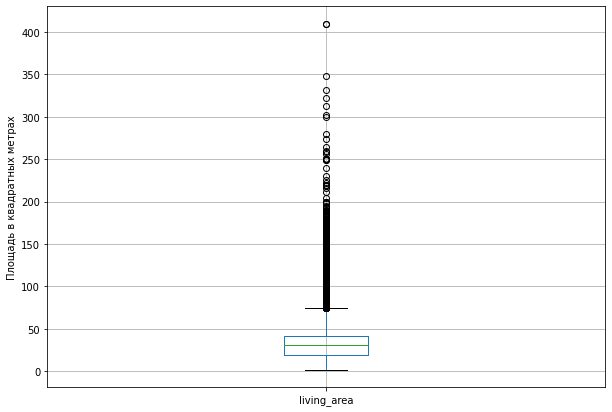

In [56]:
#Построим диаграмму размаха
print('Диаграмма размаха')
data.boxplot(column=['living_area'], figsize=(10,7), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

Диаграмма размаха площади после исключения выбивающихся значений


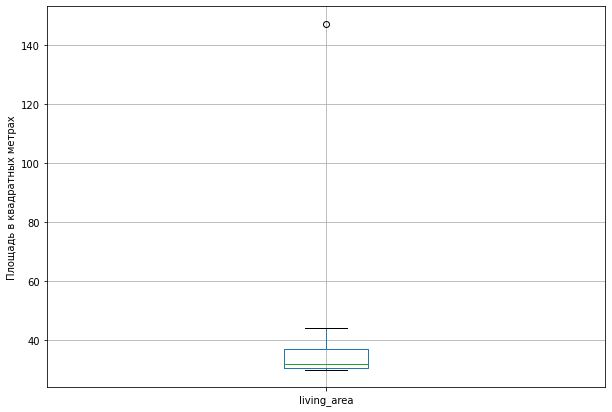

In [57]:
#Исключаем даные до 30 и более 50
df = data.query('living_area >= 30 & total_area <= 50')
print('Диаграмма размаха площади после исключения выбивающихся значений')
df.boxplot(column=['living_area'], figsize=(10,7), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

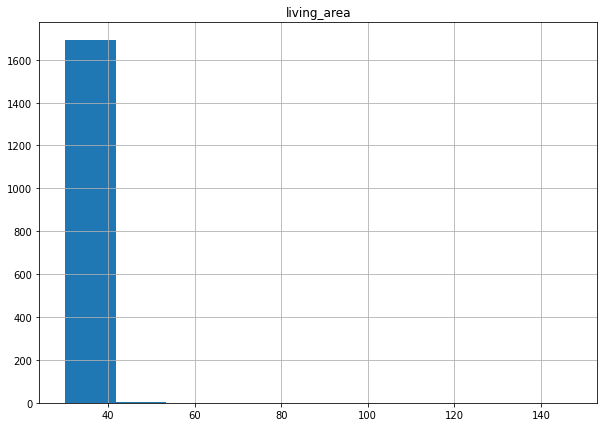

In [58]:
#Проверим на гистограмме результат
df.hist('living_area', bins=10, figsize=(10,7))

Большинство квартир имеют жилую площадь от 13 кв.м. до 50 кв.м, но есть и 400 кв.м., но это единичные случаи.

**kitchen_area — площадь кухни в квадратных метрах (м²)**

In [59]:
#Изучим параметр kitchen_area 
print(data.kitchen_area.describe())

count    23650.000000
mean        10.421433
std          5.632512
min          0.000000
25%          7.300000
50%          9.100000
75%         11.400000
max        112.000000
Name: kitchen_area, dtype: float64


array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

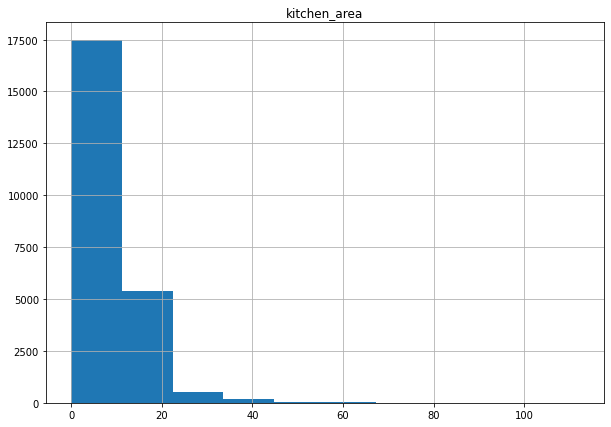

In [60]:
#Проверим на гистограмме 
data.hist('kitchen_area', bins=10, figsize=(10,7))

Диаграмма размаха


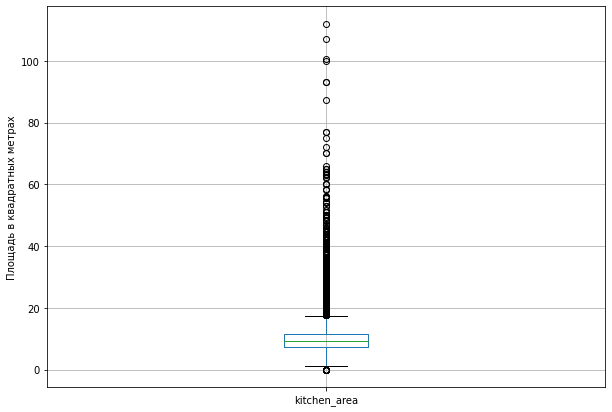

In [61]:
#Построим диаграмму размаха
print('Диаграмма размаха')
data.boxplot(column=['kitchen_area'], figsize=(10,7), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

Диаграмма размаха площади после исключения выбивающихся значений


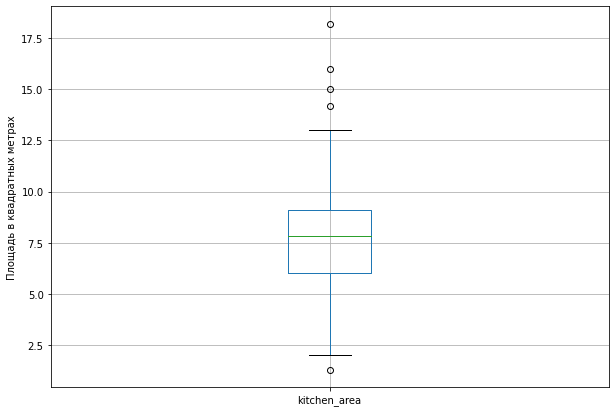

In [62]:
#Исключаем даные до 1 и более 30
df = data.query('kitchen_area >= 1 & total_area <= 30')
print('Диаграмма размаха площади после исключения выбивающихся значений')
df.boxplot(column=['kitchen_area'], figsize=(10,7), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

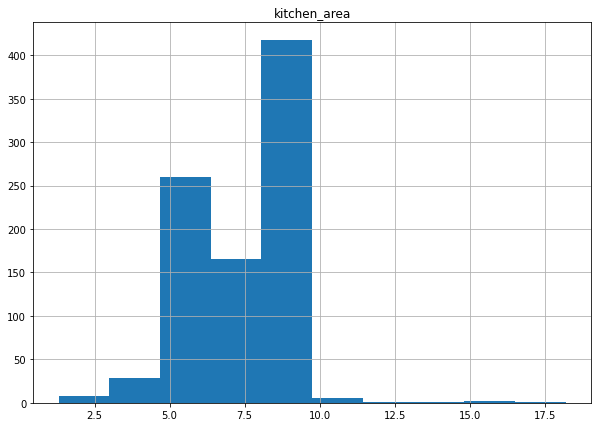

In [63]:
#Проверим на гистограмме результат
df.hist('kitchen_area', bins=10, figsize=(10,7))

Больше всего площадь кухни от 8 кв.м. до 9 кв.м., чуть меньше площадью 5 - 6 кв.м.

**last_price — цена на момент снятия с публикации**

In [64]:
#Изучим параметр last_price 
print(data.last_price.describe())

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

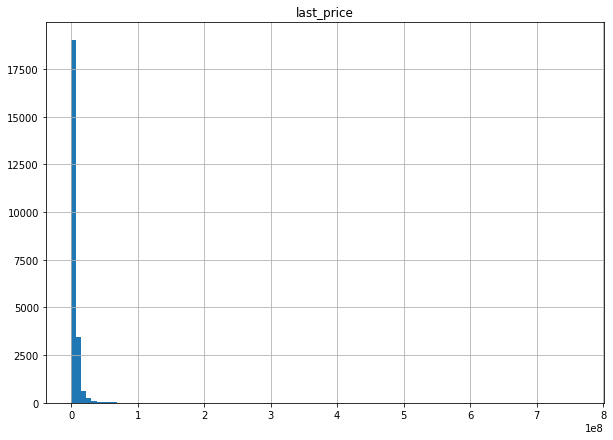

In [65]:
#Проверим на гистограмме 
data.hist('last_price', bins=100, figsize=(10,7))

Диаграмма размаха


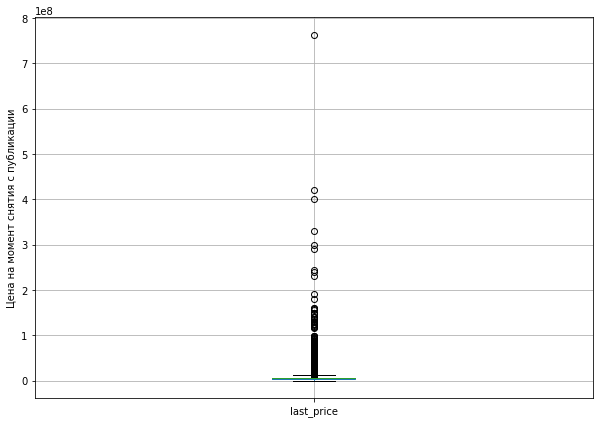

In [66]:
#Построим диаграмму размаха
print('Диаграмма размаха')
data.boxplot(column=['last_price'], figsize=(10,7), grid=True)
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

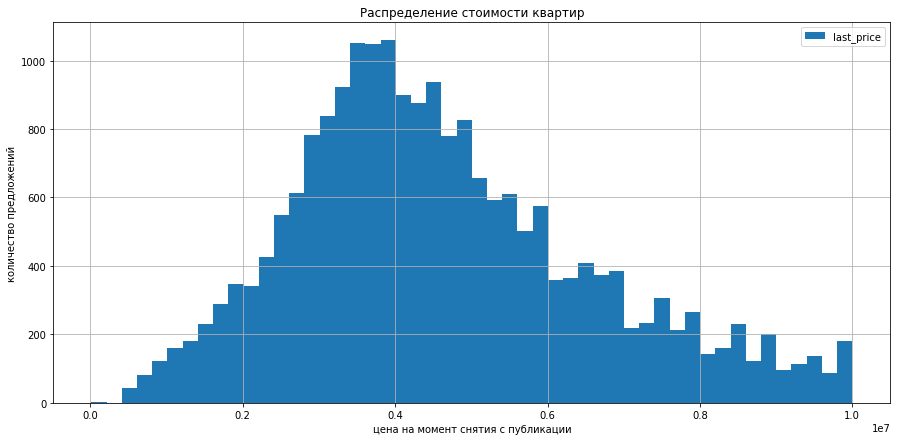

In [67]:
#Исключаем даные более 8 млн.
df = data.query('last_price <= 10000000')
df.plot(kind='hist', y='last_price', title='Распределение стоимости квартир',grid=True, bins=50, figsize=(15,7))
plt.ylabel('количество предложений')
plt.xlabel('цена на момент снятия с публикации')
plt.show()

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

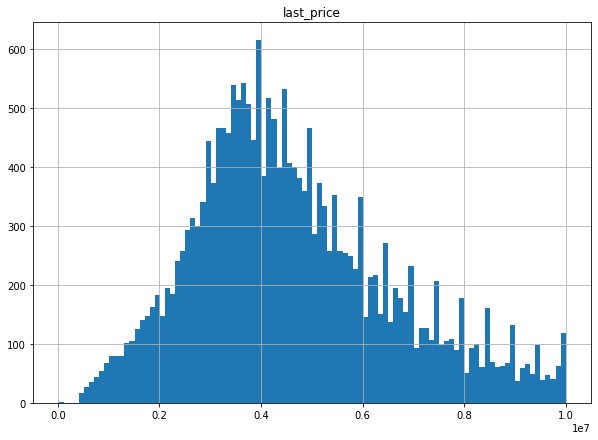

In [68]:
#Проверим на гистограмме результат
df.hist('last_price', bins=100, figsize=(10,7))

Чаще всего встречаются варинты продажи по цене  2.5 - 7 млн., пик приходится на квартиры в 4 млн.

**rooms — число комнат**

In [69]:
#Изучим параметр rooms 
print(data.rooms.describe())

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

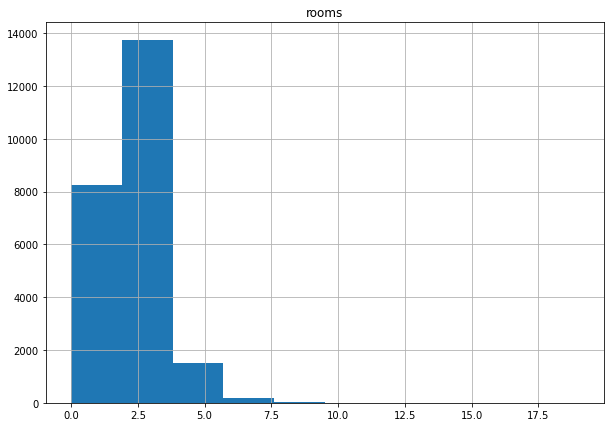

In [70]:
#Проверим на гистограмме 
data.hist('rooms', bins=10, figsize=(10,7))

Диаграмма размаха


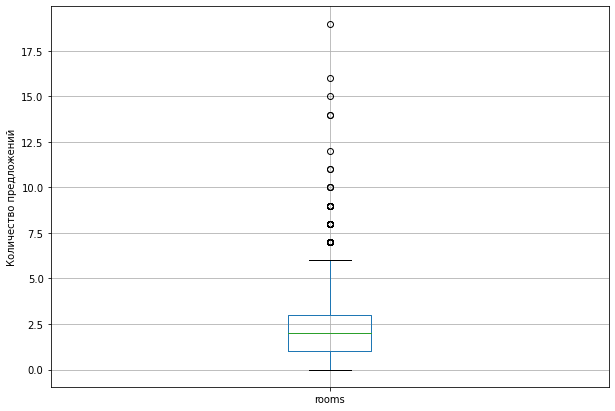

In [71]:
#Построим диаграмму размаха
print('Диаграмма размаха')
data.boxplot(column=['rooms'], figsize=(10,7), grid=True)
plt.ylabel('Количество предложений')
plt.show()

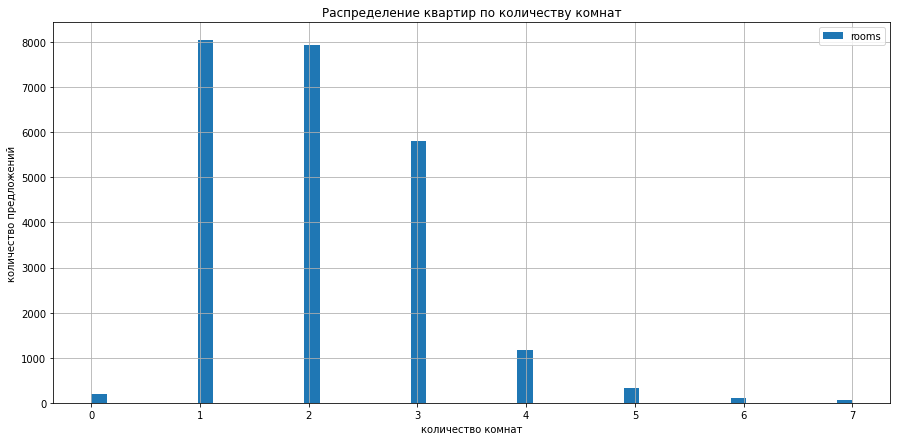

In [72]:
#Исключаем даные более 7 комнат
df = data.query('rooms <= 7')
df.plot(kind='hist', y='rooms', title='Распределение квартир по количеству комнат',grid=True, bins=50, figsize=(15,7))
plt.ylabel('количество предложений')
plt.xlabel('количество комнат')
plt.show()

Наибольше количество комнат 1, чуть меньше вариантов с  количеством комнат 2, с 3 комнатами встречаются уже чуть менее.

**ceiling_height - высота потолков (м)**

In [73]:
#Изучим параметр rooms 
print(data.ceiling_height.describe())

count    23650.000000
mean         2.681844
std          0.258639
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64


array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

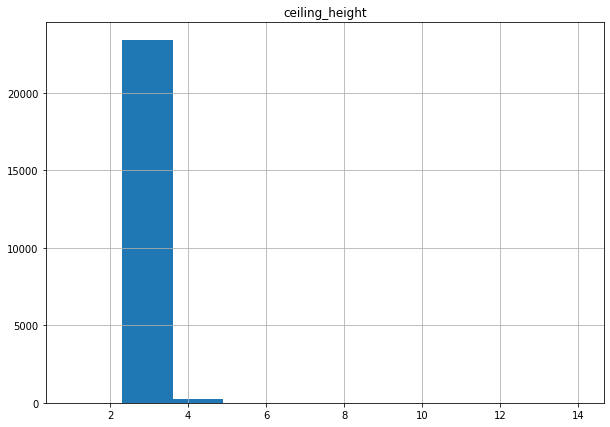

In [74]:
#Проверим на гистограмме 
data.hist('ceiling_height', bins=10, figsize=(10,7))

Диаграмма размаха


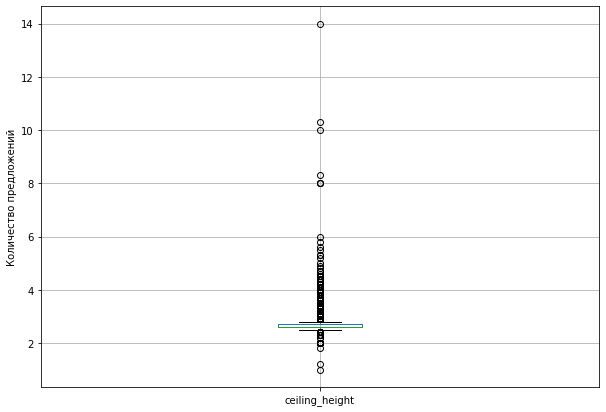

In [75]:
#Построим диаграмму размаха
print('Диаграмма размаха')
data.boxplot(column=['ceiling_height'], figsize=(10,7), grid=True)
plt.ylabel('Количество предложений')
plt.show()

Диаграмма размаха площади после исключения выбивающихся значений


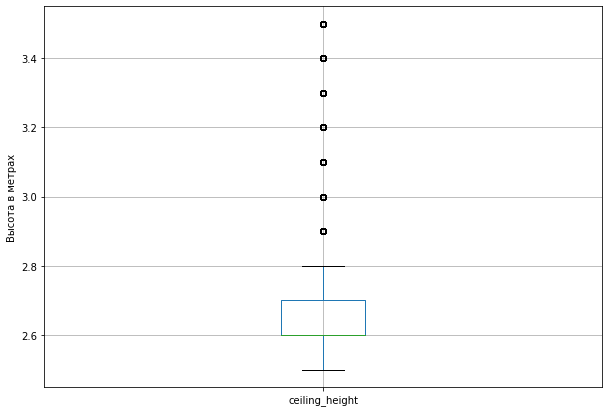

In [76]:
#Исключаем даные до 2.5 и более 3.5 (данные по ГОСТу 2.5-2.8). 
#В Санкт-Петербурге много домов постороены до формирования ГОСТ, поэтому покзатель чуть выше.
df = data.query('ceiling_height >= 2.5 & ceiling_height <= 3.5')
print('Диаграмма размаха площади после исключения выбивающихся значений')
df.boxplot(column=['ceiling_height'], figsize=(10,7), grid=True)
plt.ylabel('Высота в метрах')
plt.show()

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

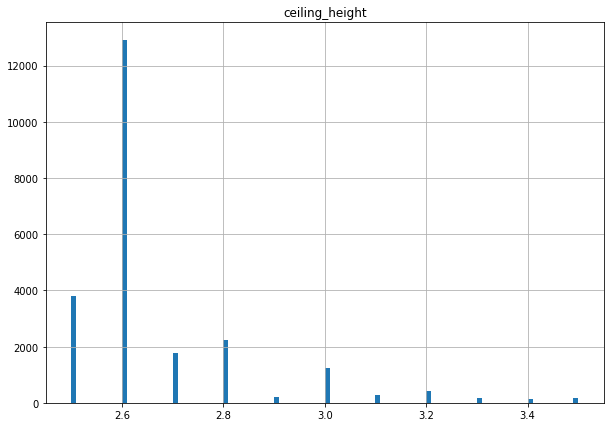

In [77]:
#Проверим на гистограмме 
df.hist('ceiling_height', bins=100, figsize=(10,7))

Средняя высота потолков 2.6 метра, но есть квартиры 2,8 и 3 метров.

**floor_type - тип этажа квартиры («первый», «последний», «другой»)**

In [78]:
#Изучим параметр floor_type 
data.floor_type.describe()

count      23650
unique         3
top       другой
freq       17408
Name: floor_type, dtype: object

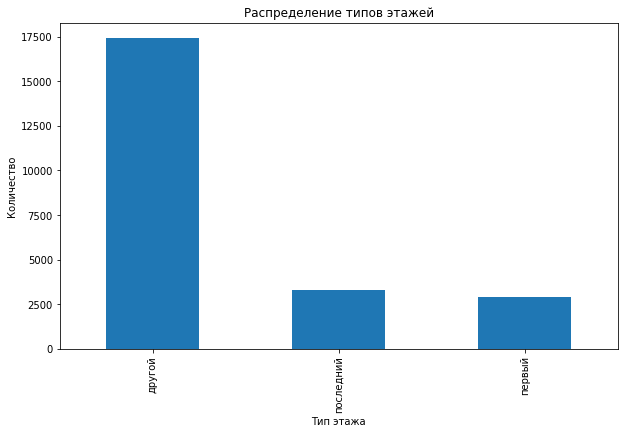

In [79]:
#Проверим на диаграмме, так как тип столбца категориальный
data['floor_type'].value_counts().plot(kind='bar', figsize=(10, 6), title='Распределение типов этажей')
plt.xlabel('Тип этажа')
plt.ylabel('Количество')
plt.show()

В основном тип этажа - другой (около 17500 объявлений), около 3000 объявлений с последним и первым этажами.

**floors_total - всего этажей в доме**

In [80]:
#Изучим параметр floors_total
print(data.floors_total.describe())

count    23650.000000
mean        10.637505
std          6.613891
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

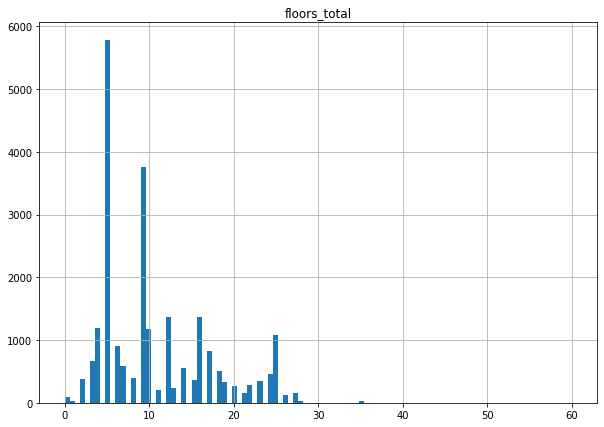

In [81]:
#Проверим на гистограмме 
data.hist('floors_total', bins=100, figsize=(10,7))

Диаграмма размаха


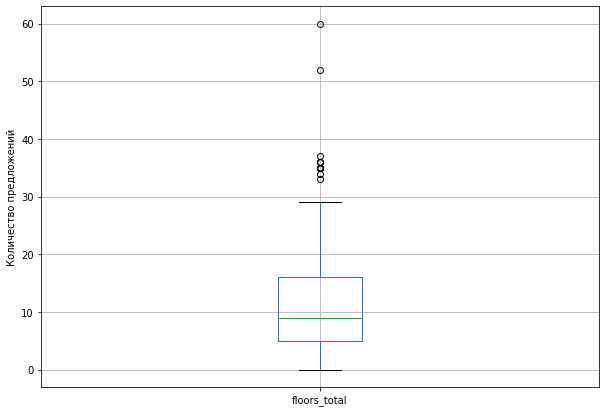

In [82]:
#Построим диаграмму размаха
print('Диаграмма размаха')
data.boxplot(column=['floors_total'], figsize=(10,7), grid=True)
plt.ylabel('Количество предложений')
plt.show()

Диаграмма размаха площади после исключения выбивающихся значений


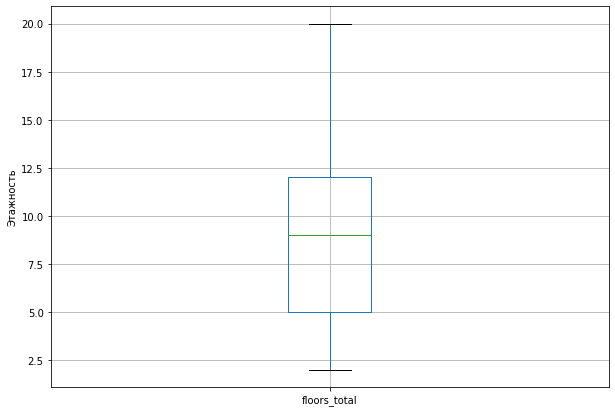

In [83]:
#Исключаем даные до 2 и более  30 (самое высокое здание в Санкт-Петербурге имеет 37 этажей по данным Google)
df = data.query('floors_total >= 2 & floors_total <= 20')
print('Диаграмма размаха площади после исключения выбивающихся значений')
df.boxplot(column=['floors_total'], figsize=(10,7), grid=True)
plt.ylabel('Этажность')
plt.show()

Наибольшое  количество объявлений с этажностю жилого дома - 5 этажей, пик приходится на дома с 9 этажами.

**city_centers_nearest - расстояние до центра города в метрах**

In [84]:
#Изучим параметр city_centers_nearest
print(data.city_centers_nearest.describe())

count    23650.000000
mean     10889.429006
std       9635.531486
min          0.000000
25%       2242.000000
50%      11250.000000
75%      15247.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


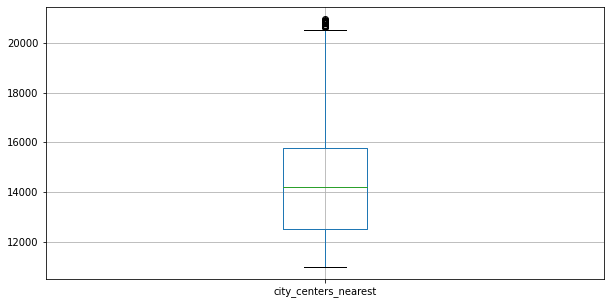

In [85]:
#Исключаем даные до 11000 и более  21000 через диаграмму размаха
df = df.query('city_centers_nearest > 11000 and city_centers_nearest < 21000')
df.boxplot('city_centers_nearest', figsize=(10,5));

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

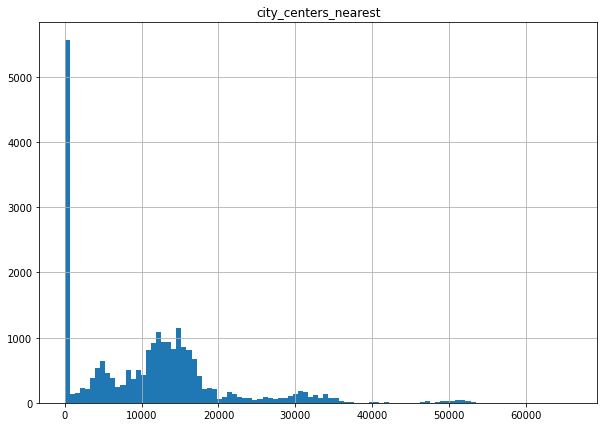

In [86]:
#Проверим на гистограмме 
data.hist('city_centers_nearest', bins=100, figsize=(10,7))

Большинство предложений с квартирами на  расстояние до центра города от 5000 м до 18000 м., пик приходится на 15000 м. от центра.

**parks_nearest -расстояние до ближайшего парка (м.)**

In [87]:
#Изучим параметр parks_nearest
print(data.parks_nearest.describe())

count    23650.000000
mean       167.359789
std        306.832134
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       3190.000000
Name: parks_nearest, dtype: float64


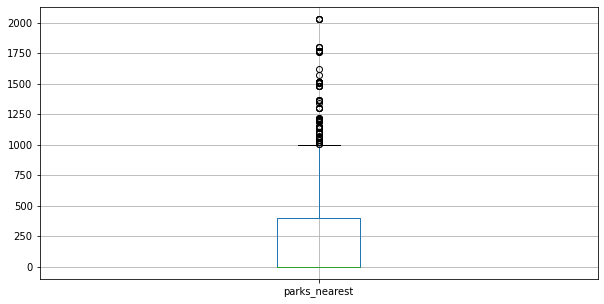

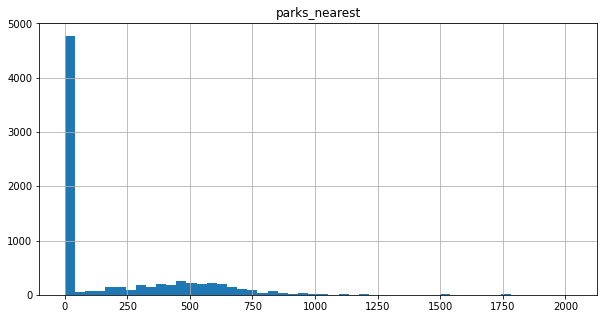

In [88]:
#Построим диаграмму и гистаграмму 
df.boxplot('parks_nearest', figsize=(10,5))
df.hist('parks_nearest', bins=50, figsize=(10,5));

<AxesSubplot:>

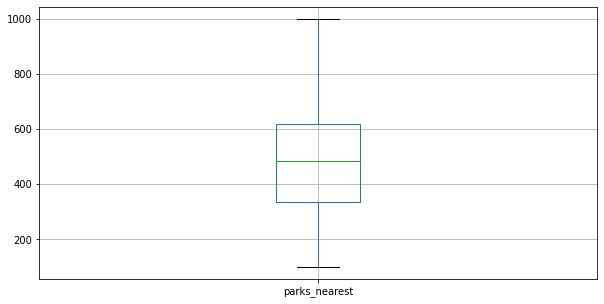

In [89]:
#Исключаем даные до 100 и более  1000 через диаграмму размаха
df = df.query('parks_nearest >= 100 & parks_nearest <= 1000')
df.boxplot('parks_nearest', figsize=(10,5))

Большинство вариантов квартир в близости к парку от 300 м.до 600 м., пик приходится на 500 м.

- Чаще всего встречаются варинты продажи по цене  2.5 - 7 млн., пик приходится на квартиры в 4 млн.
- Большое количество квартир от 30 кв.м. до 80 кв.м., пик приходится на 50 кв.м. 
- Большинство квартир имеют жилую площадь от 13 кв.м. до 50 кв.м, но есть и 400 кв.м., но это единичные случаи. -Больше всего площадь кухни от 8 кв.м. до 9 кв.м., чуть меньше площадью 5 - 6 кв.м.
- Наибольше количество  однокомнатных квартир, чуть меньше вариантов с  количеством комнат 2.
- Средняя высота потолков 2.6 метра. 
- В основном тип этажа - другой (около 17500 объявлений), около 3000 объявлений с последним и первым этажами.   
- Наибольшое  количество объявлений с этажностю жилого дома - 5 этажей, пик приходится на дома с 9 этажами.  
- Большинство вариантов квартир в близости к парку от 300 м.до 600 м., пик приходится на 500 м.
- Большинство предложений с квартирами на  расстояние до центра города от 5000 м до 18000 м., пик приходится на 15000 м. от центра. 

 Посчитаем долю удаленных данных из датафрейма и отфильтруем заглушки.</b> 


In [90]:
# Количество строк до удаления пропусков
total_rows_before = len(data)

# Удаление строк с пропущенными значениями
data_without_missing = data.dropna()

# Количество строк после удаления пропусков
total_rows_after = len(data_without_missing)

# Вычисление доли удаленных данных
percentage_removed = ((total_rows_before - total_rows_after) / total_rows_before) * 100
print("Доля удаленных данных из датафрейма:", percentage_removed, "%")

Доля удаленных данных из датафрейма: 13.509513742071883 %


По замене пропусков оценила, что по столбцам kitchen_area, living_area можно прописать пропорцией как  соотносится жилая площадь к кухне, так же высоту потолков можно было привязать к районам. 


In [91]:
#Отфильтруем заглушки в данных
selected_columns = ['last_price', 'total_area', 'rooms', 'floors_total', 'floor_type', 'ceiling_height', 'kitchen_area', 'living_area', 'parks_nearest','city_centers_nearest']
# Создаем новый DataFrame только с выбранными столбцами, удаляя строки с пропущенными значениями
filtered_data = data[selected_columns].dropna()

In [92]:
#изучим параметры filtered_data: 
filtered_data.describe()

,last_price,total_area,rooms,floors_total,ceiling_height,kitchen_area,living_area,parks_nearest,city_centers_nearest
count,2.363300e+04,23633.000000,23633.000000,23633.000000,23633.000000,23633.000000,23633.000000,23633.000000,23633.000000
mean,6.544222e+06,60.330999,2.070114,10.641476,2.681919,10.422464,34.411247,167.480176,10895.024077
std,1.089952e+07,35.654245,1.078598,6.613384,0.258713,5.634394,21.201245,306.909629,9634.024731
min,1.219000e+04,12.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
25%,3.413000e+06,40.000000,1.000000,5.000000,2.600000,7.300000,19.000000,0.000000,2254.000000
50%,4.650000e+06,52.000000,2.000000,9.000000,2.600000,9.100000,30.800000,0.000000,11265.000000
75%,6.800000e+06,69.750000,3.000000,16.000000,2.700000,11.400000,41.100000,302.000000,15250.000000
max,7.630000e+08,900.000000,19.000000,60.000000,14.000000,112.000000,409.700000,3190.000000,65968.000000


- по общей площади: есть как квартира 12 кв.м., так и 900 кв.м., среднее значение 60 кв.м.;
- по цене за квартиру: есть варианты и за 12 тысяч рублей, есть за 763 млн.;
- по комнатам: от 0 (студия) до 19;
- по количеству этажей: от 0 до 60;
- по высоте потолков: от 1 до 14 метров;
- по площади кухни: от 0 до 112;
- по жилой площади: от 2 кв.м.до 409 кв.м.
- по близости парка: от 300 м.до 3190 м;
- по удаленности от центра: от 0 до 65968 м.

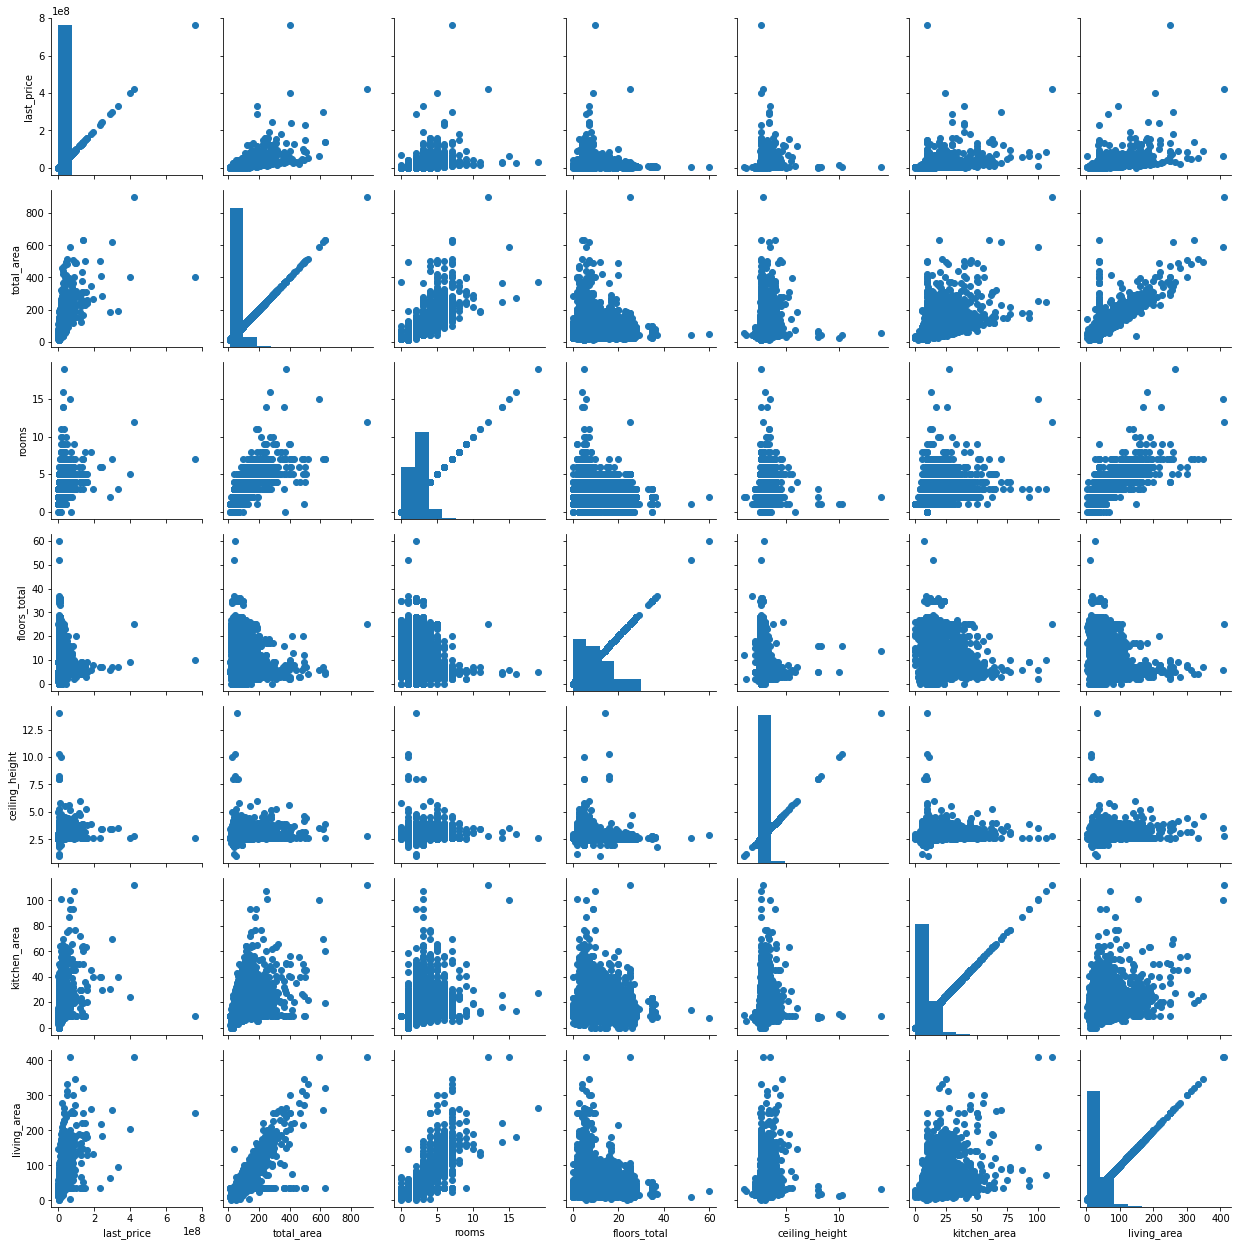

In [93]:
#Создадим графики
g = sns.PairGrid(filtered_data.loc[:,['last_price', 'total_area', 'rooms', 'floors_total', 'floor_type', 'ceiling_height', 'kitchen_area', 'living_area']])
g.map_diag(plt.hist)
g.map(plt.scatter)

In [94]:
#Определим количество квартир исходя из отфильтрованных данных
print('Выборка квартир -', filtered_data.shape[0], 'квартир')

Выборка квартир - 23633 квартир


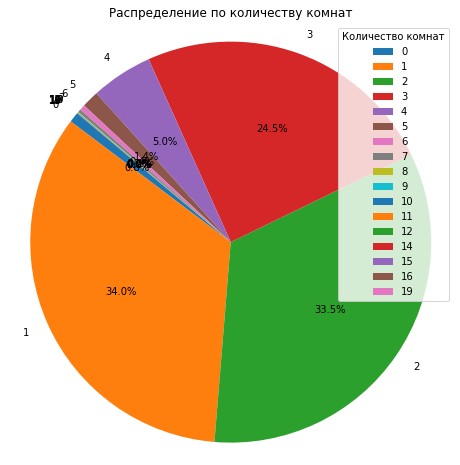

In [95]:
#Проверим изменения показателей нескольких столбцов после фильтрации
#Создаем отдельную сводную таблицу для создания круговой диаграммы
rooms_pivot = filtered_data.pivot_table(index='rooms', values='last_price', aggfunc='count')
# Построение круговой диаграммы для распределения по количеству комнат
plt.figure(figsize=(8, 8))
plt.pie(rooms_pivot['last_price'], labels=rooms_pivot.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение по количеству комнат')
plt.axis('equal') 

# Создание легенды для объяснения категорий количества комнат
plt.legend(title='Количество комнат', loc='upper right')
plt.show()

Самое большое количество однокомнатных квартир (33.6%), двухкомнатных квартир -32.4%, трехкомнатных -25.1% от общего числа отфильтрованных квартир (23633). Вывод стал более точным.

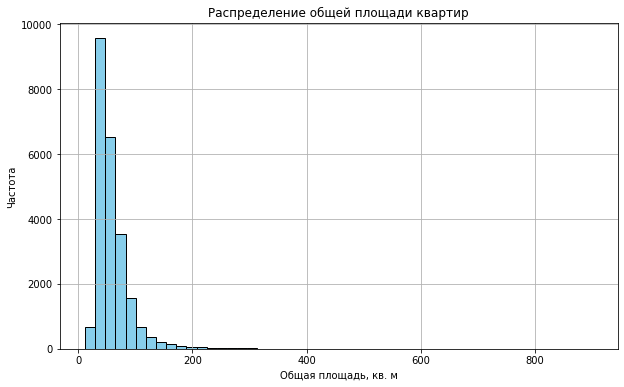

In [96]:
# Построение гистограммы для распределения общей площади квартир
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['total_area'], bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение общей площади квартир')
plt.xlabel('Общая площадь, кв. м')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Самое большое количество квартир с общей площадью от 35 кв.м. до 60 кв.м. Данные уточнены после фильтрации.

Уточним вывод:
- Чаще всего встречаются варинты продажи по цене 2.5 - 7 млн., пик приходится на квартиры в 4 млн.
- Самое большое количество квартир с общей площадью от 35 кв.м. до 60 кв.м. 
- Большинство квартир имеют жилую площадь от 13 кв.м. до 50 кв.м, но есть и 400 кв.м., но это единичные случаи. -Больше всего площадь кухни от 8 кв.м. до 9 кв.м., чуть меньше площадью 5 - 6 кв.м.
- Самое большое количество однокомнатных квартир (33.6%), двухкомнатных квартир -32.4%, трехкомнатных -25.1% от общего числа отфильтрованных квартир (23633).
- Средняя высота потолков 2.6 метра.
- В основном тип этажа - другой (около 17500 объявлений), около 3000 объявлений с последним и первым этажами. -Наибольшое количество объявлений с этажностю жилого дома - 5 этажей, пик приходится на дома с 9 этажами. 
- Большинство вариантов квартир в близости к парку от 300 м.до 600 м., пик приходится на 500 м.
- Большинство предложений с квартирами на расстояние до центра города от 5000 м до 18000 м., пик приходится на 15000 м. от центра.

In [97]:
#Отфильтруем заглушки в данных city_centers_nearest parks_nearest
selected_columns_two = ['city_centers_nearest', 'parks_nearest']
# Создаем новый DataFrame только с выбранными столбцами
filtered_data_two = data[selected_columns_two].dropna()

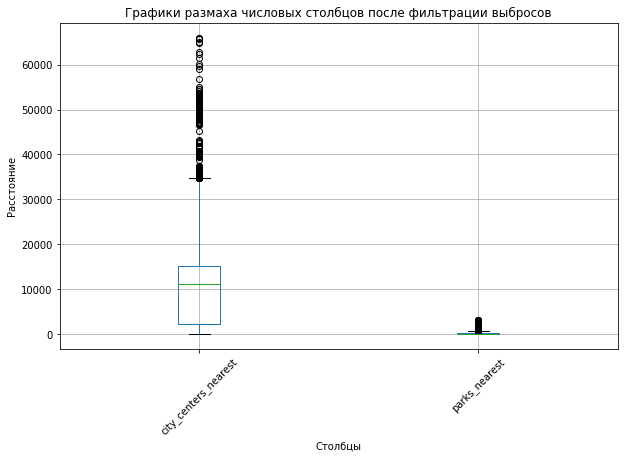

In [98]:
#Проверим через график размаха
numeric_columns = ['city_centers_nearest', 'parks_nearest']

# Построение графиков размаха
plt.figure(figsize=(10, 6))
filtered_data_two.boxplot(column=numeric_columns)
plt.title('Графики размаха числовых столбцов после фильтрации выбросов')
plt.ylabel('Расстояние')
plt.xlabel('Столбцы')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [99]:
q25 = filtered_data_two['city_centers_nearest'].quantile(0.25)
q75 = filtered_data_two['city_centers_nearest'].quantile(0.75)

# Фильтрация данных: оставляем только строки, где столбец находится в интервале между q25 и q75
filtered_data_two = filtered_data_two[(filtered_data_two['city_centers_nearest'] >= q25) & (filtered_data_two['city_centers_nearest'] <= q75)]

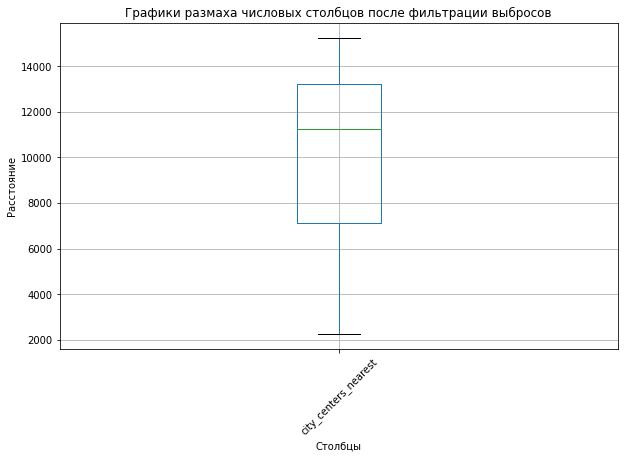

In [100]:
#Проверим через график размаха результат
numeric_columns = ['city_centers_nearest']

# Построение графиков размаха
plt.figure(figsize=(10, 6))
filtered_data_two.boxplot(column=numeric_columns)
plt.title('Графики размаха числовых столбцов после фильтрации выбросов')
plt.ylabel('Расстояние')
plt.xlabel('Столбцы')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Большинство предложений с квартирами на расстояние до центра города от 9600 м до 12800 м., пик приходится на 11400 м. от центра. 

In [101]:
q25 = filtered_data_two['parks_nearest'].quantile(0.25)
q75 = filtered_data_two['parks_nearest'].quantile(0.75)

# Фильтрация данных: оставляем только строки, где столбец находится в интервале между q25 и q75
filtered_data_two = filtered_data_two[(filtered_data_two['parks_nearest'] >= q25) & (filtered_data_two['parks_nearest'] <= q75)]

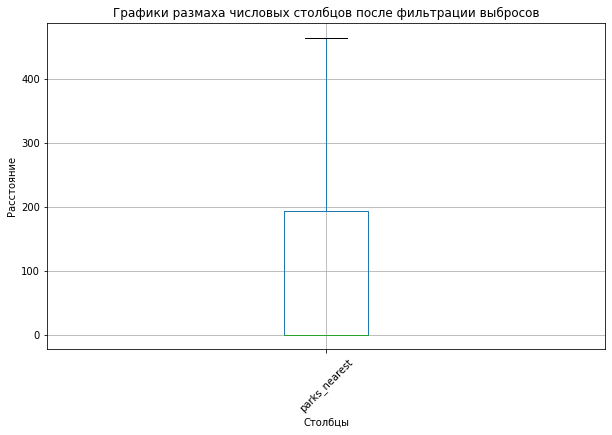

In [102]:
#Проверим через график размаха результат
numeric_columns = ['parks_nearest']

# Построение графиков размаха
plt.figure(figsize=(10, 6))
filtered_data_two.boxplot(column=numeric_columns)
plt.title('Графики размаха числовых столбцов после фильтрации выбросов')
plt.ylabel('Расстояние')
plt.xlabel('Столбцы')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Большинство вариантов квартир в близости к парку до 500 м.Вывод уточнен после фильтрации.

Понимаем, что  данные о растоянии 'city_centers_nearest', 'parks_nearest' можно было не менять, так как они были получены из данных навигации, которые заполнить не можем. Замена пропусков на "0" дала большой выброс на графике.

4.2.Изучим, как быстро продавались квартиры (столбец days_exposition). 

In [103]:
#Изучим столбец 
data['days_exposition'].describe().to_frame()

,days_exposition
count,20470.000000
mean,180.753200
std,219.777916
min,1.000000
25%,45.000000
50%,95.000000
75%,231.000000
max,1580.000000


Среднее время продажи - полгода, 180 дней. Медианное - 95 дней.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

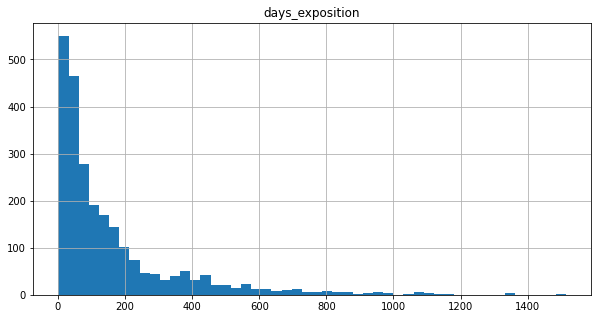

In [104]:
df.hist('days_exposition', bins=50, figsize=(10,5))


Большая часть квартир продавалась в течение первых 50 дней, есть и квартиры, которые продавались около года. Но квартир, которые продавались более двух лет немного, видимо есть обоснованные причины для этого.

<AxesSubplot:>

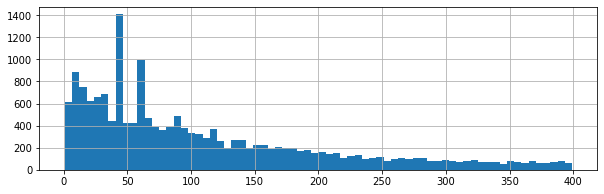

In [105]:
#Ограничим период продажи 400 днями
data.query('days_exposition<400')['days_exposition'].hist(bins=70, figsize=(10,3))

**Большая часть квартир продавалась в первые 40 дней после размещения объявления. Есть варианты с быстрыми продажами, где квартиры продавались в течение первых 10 дней, но данных варинатов около 900 объявлений, варианты с продажей более 300 дней можно рассмтривать как долгие.** 

In [106]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Откорректированный вывод:
- Быстрые продажи: квартиры, проданные за период, меньший или равный 25-му проценту, то есть менее чем за 45 дня. Эти квартиры продались относительно быстро.
- Долгие продажи: квартиры, проданные за период, больший или равный 75-му проценту, то есть более чем за 231 дней. Эти квартиры продавались довольно долго.

4.3.Исследуем факторы, которые  больше всего влияют на общую (полную) стоимость объекта (зависимость цены от общей площади, жилой площади, площади кухни, количества комнат, этажа, на котором расположена квартира (первый, последний, другой),даты размещения (день недели, месяц, год).

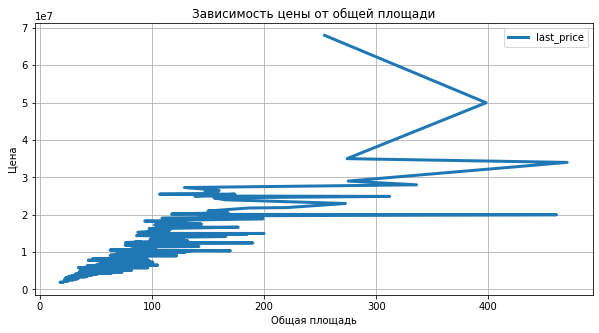

In [107]:
#Определим зависимость цены от общей площади 
df.pivot_table(index='total_area', values='last_price').sort_values(by='last_price', ascending=True) \
  .plot(grid=True, figsize=(10, 5),linewidth=3, title='Зависимость цены от общей площади')

plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()

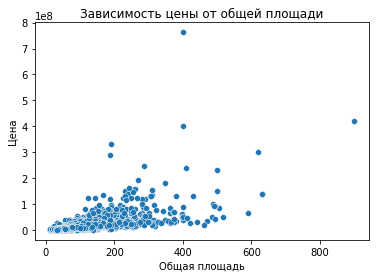

Коэффициент корреляции между общей площадью и ценой: 0.6537428966335395


In [108]:
#Создадим график рассеяния и вычислим коэффициент корреляции между ценой и общей площадью
# Удаление пропущенных значений для избежания ошибок
data_filtered = data.dropna(subset=['total_area', 'last_price'])

# Построение графика рассеяния
sns.scatterplot(x='total_area', y='last_price', data=data_filtered)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()

# Вычисление коэффициента корреляции
correlation = data_filtered['total_area'].corr(data_filtered['last_price'])
print('Коэффициент корреляции между общей площадью и ценой:', correlation)

Коэффициент соответствия между общей площадью и ценой составляет примерно 0,65. Это указывает на наличие сильной корреляции между двумя переменными: с увеличением общей площади цена обычно увеличивается и наоборот.

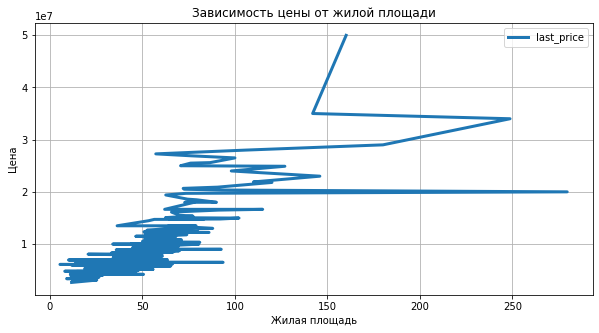

In [109]:
#Определим зависимость цены от жилой площади
df.pivot_table(index='living_area', values='last_price').sort_values(by='last_price', ascending=True) \
  .plot(grid=True, figsize=(10, 5),linewidth=3, title='Зависимость цены от жилой площади')

plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()

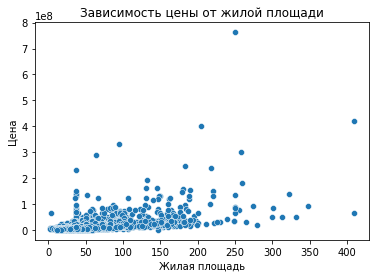

Коэффициент корреляции между жилой площадью и ценой: 0.54460134559498


In [110]:
#Создадим график рассеяния и вычислим коэффициент корреляции между ценой и жилой площадью
# Удаление пропущенных значений для избежания ошибок
data_filtered = data.dropna(subset=['living_area', 'last_price'])

# Построение графика рассеяния
sns.scatterplot(x='living_area', y='last_price', data=data_filtered)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()

# Вычисление коэффициента корреляции
correlation = data_filtered['living_area'].corr(data_filtered['last_price'])
print('Коэффициент корреляции между жилой площадью и ценой:', correlation)

Коэффициент корреляции между жилой площадью и ценой квартиры составляет примерно 0,54. Это указывает на наличие сильной корреляции между двумя переменными: с увеличением  жилой площади обычно увеличивается цена квартиры, и наоборот.

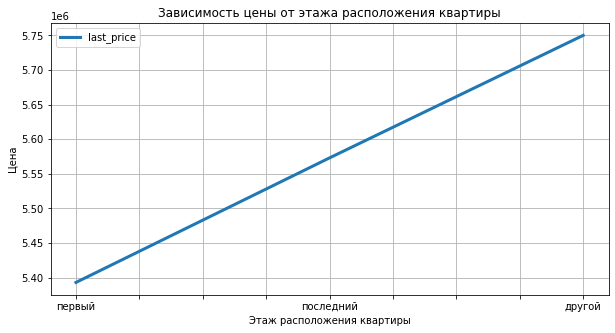

In [111]:
#Определим зависимость цены от этажа расположения квартиры
df.pivot_table(index='floor_type', values='last_price').sort_values(by='last_price', ascending=True) \
  .plot(grid=True, figsize=(10, 5),linewidth=3, title='Зависимость цены от этажа расположения квартиры')

plt.xlabel('Этаж расположения квартиры')
plt.ylabel('Цена')
plt.show()

Цены на квартиры на 1-ом этаже  ниже, чем цены на квартиры, расположенные на других этажах, кроме последнего. На последнем этаже цена дороже, чем на первом, но дешевле чем на других.

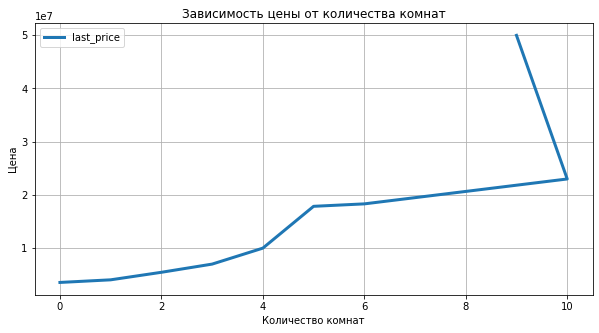

In [112]:
#Определим зависимость цены от количества комнат
df.pivot_table(index='rooms', values='last_price').sort_values(by='last_price', ascending=True) \
  .plot(grid=True, figsize=(10, 5),linewidth=3, title='Зависимость цены от количества комнат')

plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()

Чем больше комнат, тем выше цена. Зависисмоть от количества комнат прямая.

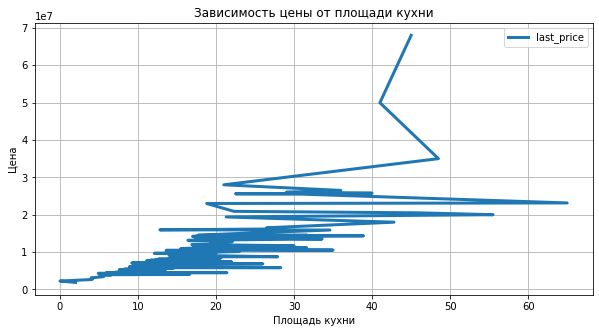

In [113]:
#Определим зависимость цены от площади кухни
df.pivot_table(index='kitchen_area', values='last_price').sort_values(by='last_price', ascending=True) \
  .plot(grid=True, figsize=(10, 5),linewidth=3, title='Зависимость цены от площади кухни')

plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.show()

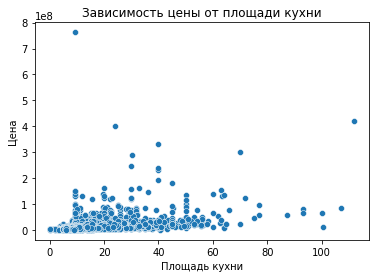

Коэффициент корреляции между площадью кухни и ценой: 0.440518081982303


In [114]:
#Создадим график рассеяния и вычислим коэффициент корреляции между ценой и площадью кухни
# Удаление пропущенных значений для избежания ошибок
data_filtered = data.dropna(subset=['kitchen_area', 'last_price'])

# Построение графика рассеяния
sns.scatterplot(x='kitchen_area', y='last_price', data=data_filtered)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.show()

# Вычисление коэффициента корреляции
correlation = data_filtered['kitchen_area'].corr(data_filtered['last_price'])
print('Коэффициент корреляции между площадью кухни и ценой:', correlation)

Коэффициент соответствия между площадью кухни и ценой квартиры составляет примерно 0,44. Это указывает на наличие сильной корреляции между двумя переменными, это означает, что с изменением площади кухни обычно увеличивается цена квартиры, и наоборот. Однако  коэффициент не очень высок, что может свидетельствовать о том, что другие факторы также оказывают влияние на цену квартиры.

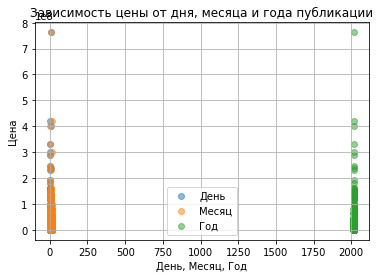

In [115]:
#Рассмотрим зависимость цены от даты размещения (день недели, месяц, год)

# Создадим точечный графикк для цены от дня, месяца, года публикации
plt.scatter(data['weekday_exposition'], data['last_price'], label='День', alpha=0.5)
plt.scatter(data['month_exposition'], data['last_price'], label='Месяц', alpha=0.5)
plt.scatter(data['year_exposition'], data['last_price'], label='Год', alpha=0.5)

plt.xlabel('День, Месяц, Год')
plt.ylabel('Цена')
plt.title('Зависимость цены от дня, месяца и года публикации')
plt.legend()
plt.grid(True)
plt.show()

array([[<AxesSubplot:title={'center':'year_exposition'}>]], dtype=object)

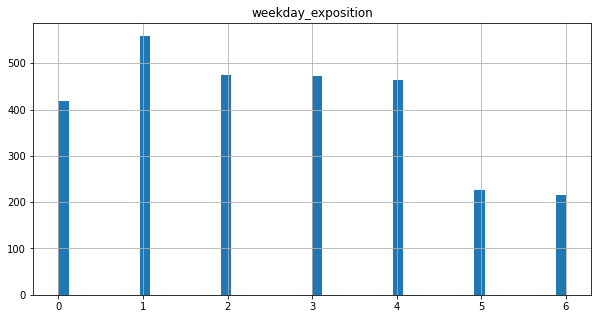

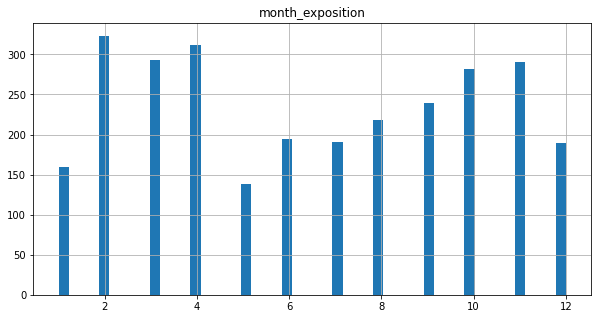

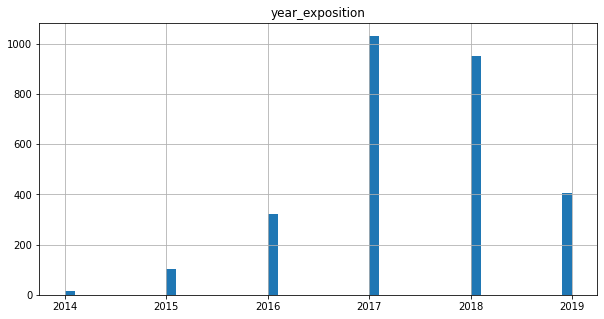

In [116]:
#Укрупним данные
df.hist('weekday_exposition', bins=50, figsize=(10,5))
df.hist('month_exposition', bins=50, figsize=(10,5))
df.hist('year_exposition', bins=50, figsize=(10,5))

In [117]:
#Проверим зависимость цены по дню недели через вычисление медианы  
median_price_by_weekday = data.groupby('weekday_exposition')['last_price'].median()
print(median_price_by_weekday)

weekday_exposition
0    4650000.0
1    4720000.0
2    4700000.0
3    4650000.0
4    4577500.0
5    4575000.0
6    4550000.0
Name: last_price, dtype: float64


In [118]:
#Проверим зависимость цены по месяцу через вычисление медианы  
median_price_by_month = data.groupby('month_exposition')['last_price'].median()
print(median_price_by_month)

month_exposition
1     4600000.0
2     4650000.0
3     4650000.0
4     4800000.0
5     4500000.0
6     4400000.0
7     4650000.0
8     4570000.0
9     4700000.0
10    4560000.0
11    4700000.0
12    4695000.0
Name: last_price, dtype: float64


In [119]:
#Проверим зависимость цены по году через вычисление медианы  
median_price_by_year = data.groupby('year_exposition')['last_price'].median()
print(median_price_by_year)

year_exposition
2014    7640000.0
2015    5350000.0
2016    4550000.0
2017    4500000.0
2018    4550000.0
2019    5050000.0
Name: last_price, dtype: float64


**Цена от дня недели размещения объявления практически никак не зависит. Только цена в будни немного выше цены в выходные.
Цена имеет зависимость от месяца размещения объявления, например в апреле цена самая высокая, а в июне самые низкие. В месяце нет зависимости роста числа объявлений и цены, например в мае низкое количество объявлений и низкая цена, но в ноябре есть рост числа объявлений и есть небольшой рост цены. Можно сделать предположение, что продавец не сильно снижает цену, рассчитывая продать квартиру до нового года, в декабре наблюдается снижение цены квартиры.
Цены зависит от года публикации, например в 2014 цена наиболее высокая,но так же можно отследить небольшое количество предложений на рынке, с 2016 по 2018 отмечается рост предложений о продаже, а так же снижение стоимости квартир. Конкуренция влияет на стоимость продажи.**

<AxesSubplot:>

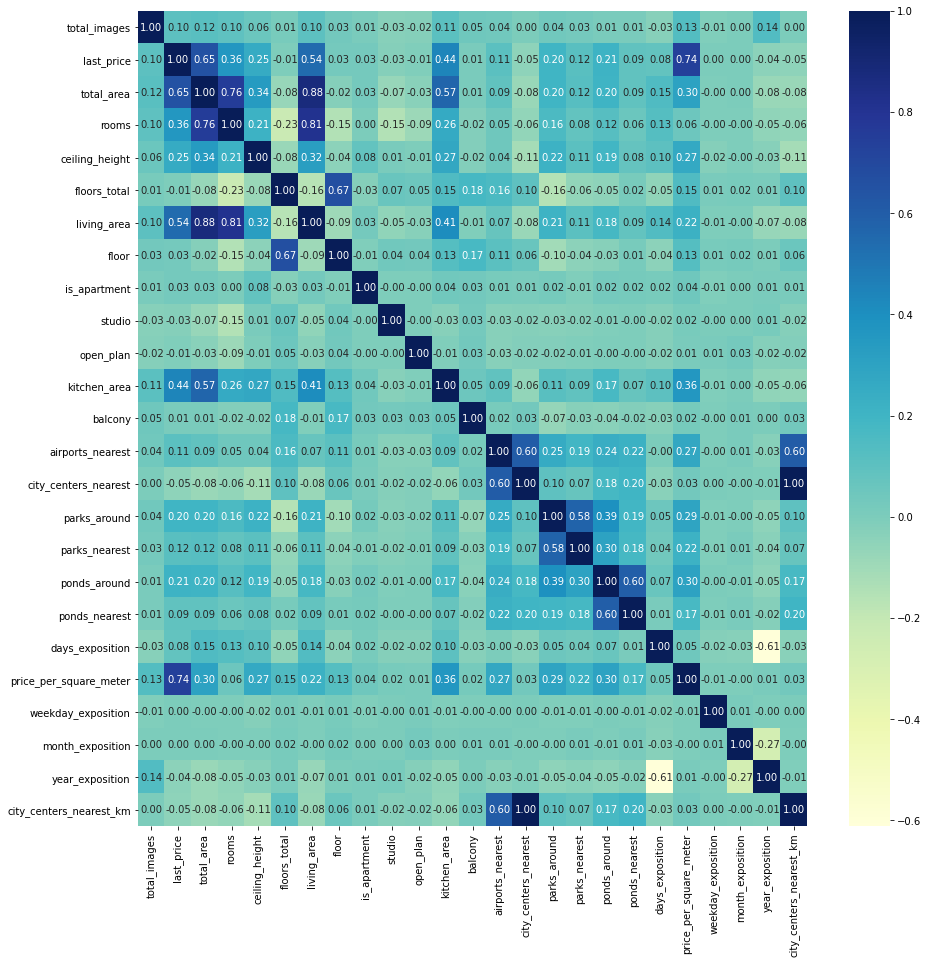

In [120]:
#Воспользуемся функцией corr() и посмотрим, как влияют определенные параметры квартиры на её финальную цену.
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu", fmt='.2f')

<AxesSubplot:>

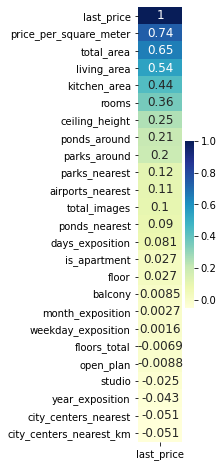

In [121]:
#Посмотрим только по столбцу last_price
plt.figure(figsize=(1,8))
sns.heatmap(data.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="YlGnBu", 
            annot=True, annot_kws={'size':12})

**Cильнее всего цена на квартиру зависит от цены за квадратный метр, от общей площади квартиры, от площади жилой площади и площади кухни (чем больше площадь тем выше цена), от количества комнат. Небольшое влияние оказывает присутствие парков/водоемов рядом, удаленность от аэропорта, а так же количество фотографий объекта (хоть мы данный параметр не рассматривали).**

4.4.Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [122]:
#Определим 10 населённых пунктов с наибольшим числом объявлений
top_localities = data['locality_name'].value_counts().head(10).index
filtered_data = data[data['locality_name'].isin(top_localities)]

#Рассчитаем среднюю цену одного квадратного метра для каждого населённого пункта
mean_price_per_sqm = filtered_data.groupby('locality_name')['price_per_square_meter'].mean()
pivot_table = pd.DataFrame({'count': filtered_data['locality_name'].value_counts(), 
                            'mean_price_per_sqm': mean_price_per_sqm})

#Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра
highest_price = pivot_table['mean_price_per_sqm'].idxmax()
lowest_price = pivot_table['mean_price_per_sqm'].idxmin()

print("Населённый пункт с самой высокой стоимостью квадратного метра:", highest_price)
print("Населённый пункт с самой низкой стоимостью квадратного метра:", lowest_price)
print(pivot_table)

Населённый пункт с самой высокой стоимостью квадратного метра: санкт-петербург
Населённый пункт с самой низкой стоимостью квадратного метра: выборг
                   count  mean_price_per_sqm
всеволожск           398        68654.473970
выборг               237        58141.909325
гатчина              307        68746.146515
деревня кудрово      299        92473.547559
колпино              338        75424.579112
посёлок мурино       556        85681.762572
посёлок парголово    327        90175.913089
посёлок шушары       440        78677.364318
пушкин               369       103125.819377
санкт-петербург    15721       114849.008793


**Населённый пункт с самой высокой стоимостью квадратного метра: Санкт-Петербург.
Населённый пункт с самой низкой стоимостью квадратного метра: Выборг.**

4.5.Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города, построим график изменения средней цены для каждого километра от центра Петербурга.

In [123]:
#Отфильтруем строки, подсчитаем количество пропущенных результатов  для отфильтрованных данных
spb = data.loc[data['locality_name'] == 'санкт-петербург']
spb['city_centers_nearest'].isna().sum()

0

Диаграмма размаха удалённости от центра


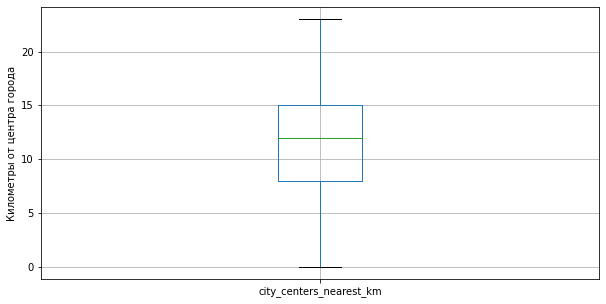

In [124]:
#Построим диаграмму размаха
spb = spb.loc[spb['city_centers_nearest_km'] < 24]
print('Диаграмма размаха удалённости от центра')
spb.boxplot('city_centers_nearest_km', figsize=(10,5))

plt.ylabel('Километры от центра города')
plt.show()

In [125]:
#Определим среднюю цену для каждого километра
mean_cost_per_km = spb['last_price'].sum()/spb['city_centers_nearest_km'].sum()
print(f'Средняя цена для каждого километра составляет', mean_cost_per_km)

Средняя цена для каждого километра составляет 707252.5457096763


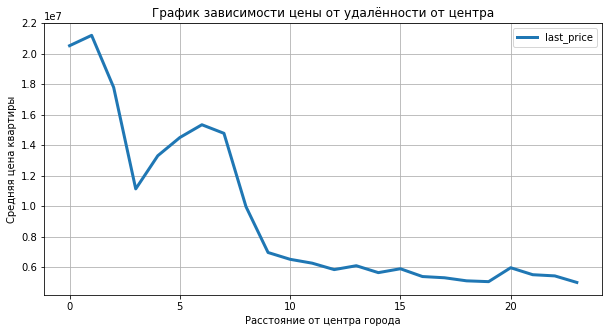

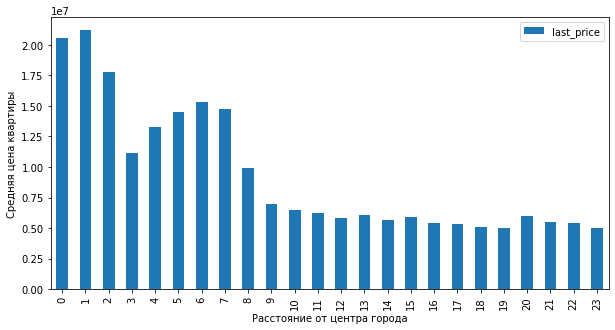

In [126]:
#Построим зависимость цены от расстояния к центру на графиках
spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean') \
   .plot(figsize=(10,5), grid=True, linewidth=3, title='График зависимости цены от удалённости от центра')
plt.xlabel('Расстояние от центра города')
plt.ylabel('Средняя цена квартиры')
plt.show()

spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean') \
   .plot(kind='bar', figsize=(10,5))
plt.xlabel('Расстояние от центра города')
plt.ylabel('Средняя цена квартиры')
plt.show()

**Цена начинает расти после достижения 8 км.от города. С удаленностью 9 км.от города цена снижается.**

### Напишите общий вывод

На цену объекта влияют следующие параметры:

- цена за квадратный метр:чем больше площадь квартры, тем выше цена; 
- общая площади квартиры: с увеличением общей площади цена обычно увеличивается и наоборот;
- жилая площадь:с увеличением жилой площади обычно увеличивается цена квартиры, и наоборот;
- площадь кухни: чем больше площадь кухни, тем выше цена квартры;
- этаж расположения квартиры: цены на квартиры на 1-ом этаже ниже, чем цены на квартиры, расположенные на других этажах, кроме последнего. На последнем этаже цена дороже, чем на первом, но дешевле чем на других;
- количество комнат: чем больше комнат тем выше цена квартры;
- день недели размещения объявления: квартиры, размещенные в будни, имеют цену выше квартир, размещенных в выходные;
- месяц размещения объявления: самые низкие цены с периоды май - август, а в апреле самые высокие, так же высокие цены в ноябре;
- год размещения объявления: самые высокие цены были в 2014 году при небольшом количестве предложений, с 2016 по 2018 отмечается рост предложений о продаже, а так же снижение стоимости квартир. Конкуренция влияет на цену.



<AxesSubplot:>

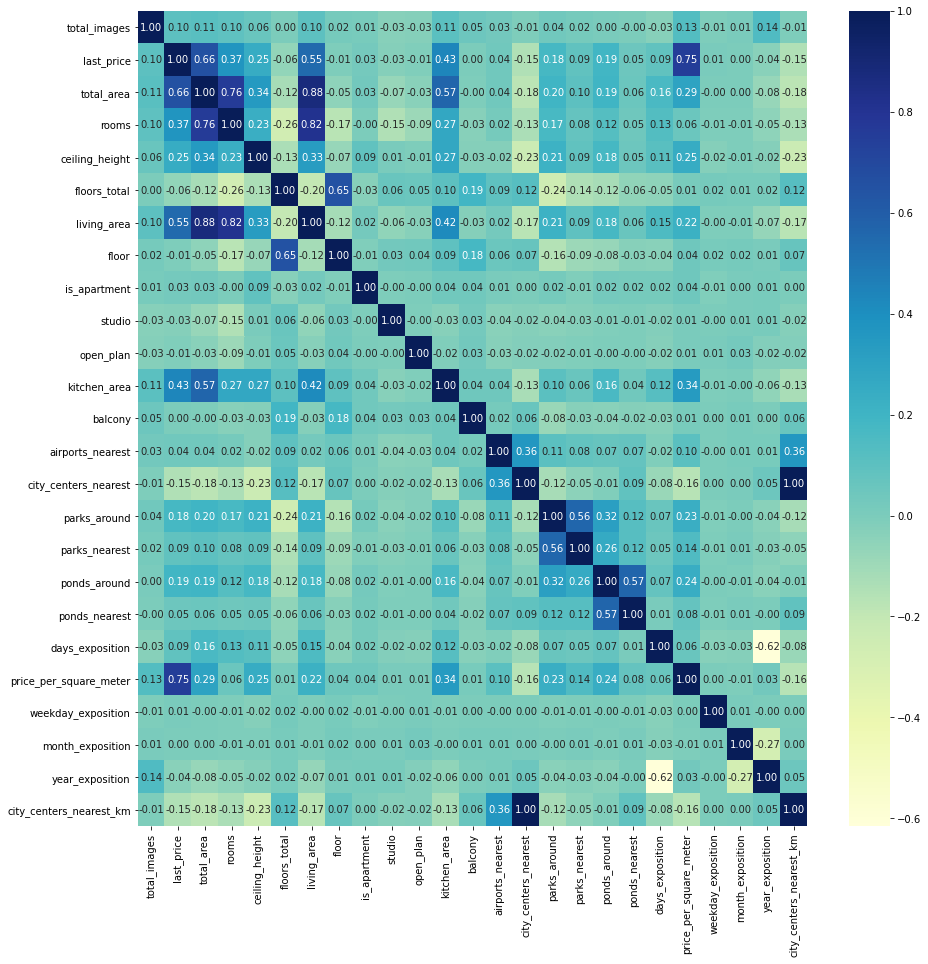

In [127]:
#Воспользуемся функцией corr() и посмотрим, как влияют определенные параметры квартиры на её финальную цену.
plt.figure(figsize=(15,15))
sns.heatmap(filtered_data.corr(), annot=True, cmap="YlGnBu", fmt='.2f')

<AxesSubplot:>

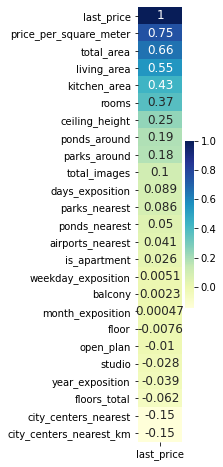

In [128]:
#Посмотрим только по столбцу last_price
plt.figure(figsize=(1,8))
sns.heatmap(filtered_data.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="YlGnBu", 
            annot=True, annot_kws={'size':12})

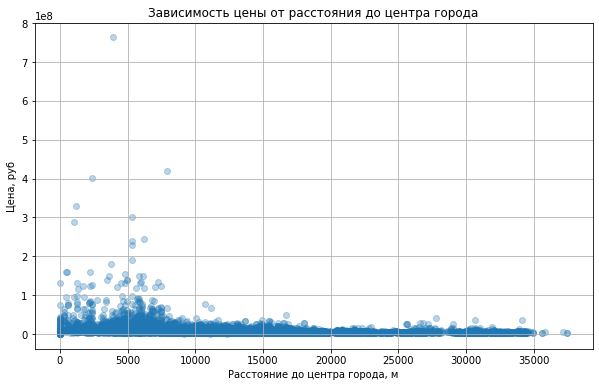

In [129]:
#изучим зависимость цены объекта от его удаленности от центра города после фильтрации 
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['city_centers_nearest'], filtered_data['last_price'], alpha=0.3)
plt.title('Зависимость цены от расстояния до центра города')
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Цена, руб')
plt.grid(True)
plt.show()

На цену объекта влияют следующие параметры:

- цена за квадратный метр:чем больше площадь квартры, тем выше цена;
- общая площади квартиры: с увеличением общей площади цена обычно увеличивается и наоборот;
- жилая площадь:с увеличением жилой площади обычно увеличивается цена квартиры, и наоборот;
- площадь кухни: чем больше площадь кухни, тем выше цена квартиры;
- количество комнат: чем больше комнат тем выше цена квартиры;
- этаж расположения квартиры: цены на квартиры на 1-ом этаже ниже, чем цены на квартиры, расположенные на других этажах, кроме последнего. На последнем этаже цена дороже, чем на первом, но дешевле чем на других;
- близость парка и водоемов влияют на цену больше, чем день недели, месяц, год размещения объявления;
- день недели размещения объявления: квартиры, размещенные в будни, имеют цену выше квартир, размещенных в выходные;
- месяц размещения объявления: самые низкие цены с периоды май - август, а в апреле самые высокие, так же высокие цены в ноябре;
- год размещения объявления: самые высокие цены были в 2014 году при небольшом количестве предложений, с 2016 по 2018 отмечается рост предложений о продаже, а так же снижение стоимости квартир. Конкуренция влияет на цену.

Чем ближе к центру, тем выше цена. Зависимость цены от удаленности от центра присутствует.